In [1]:
####import part
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.compose import ColumnTransformer
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from scipy.stats import norm
import statistics

from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA

from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score,confusion_matrix

import random

random.seed(42)

In [2]:
#load the csv file in a dataframe using read_csv function
df = pd.read_csv('drug_consumption.data',encoding="latin-1")
columns = ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity',
           'N','E','O','A','C','Impulsivness','SS','Alcohol','Amphetamine',
          'Amyl','Benzodiazepines','Caffeine','Cannabis','Chocolate','Cocaine','Crack','Ecstasy',
          'Heroine','Ketamine','Legal Highs','LSD','Meth','Mushrooms','Nicotine',
          'Semer','VSA']
df.columns=columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               1884 non-null   int64  
 1   Age              1884 non-null   float64
 2   Gender           1884 non-null   float64
 3   Education        1884 non-null   float64
 4   Country          1884 non-null   float64
 5   Ethnicity        1884 non-null   float64
 6   N                1884 non-null   float64
 7   E                1884 non-null   float64
 8   O                1884 non-null   float64
 9   A                1884 non-null   float64
 10  C                1884 non-null   float64
 11  Impulsivness     1884 non-null   float64
 12  SS               1884 non-null   float64
 13  Alcohol          1884 non-null   object 
 14  Amphetamine      1884 non-null   object 
 15  Amyl             1884 non-null   object 
 16  Benzodiazepines  1884 non-null   object 
 17  Caffeine      

In [4]:

#focus the analysis on some drugs not all of them
df.drop('Amphetamine', axis=1, inplace=True)
df.drop('Amyl',axis=1, inplace=True)
df.drop('Benzodiazepines',axis=1, inplace=True)
df.drop('Crack',axis=1, inplace=True)
df.drop('Ketamine',axis=1, inplace=True)
df.drop('Legal Highs',axis=1, inplace=True)
df.drop('LSD',axis=1, inplace=True)
df.drop('Meth',axis=1, inplace=True)
df.drop('Mushrooms',axis=1, inplace=True)
df.drop('Semer',axis=1, inplace=True)
df.drop('VSA',axis=1, inplace=True)
df.drop('Caffeine',axis=1, inplace=True)
df.drop('Chocolate',axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            1884 non-null   int64  
 1   Age           1884 non-null   float64
 2   Gender        1884 non-null   float64
 3   Education     1884 non-null   float64
 4   Country       1884 non-null   float64
 5   Ethnicity     1884 non-null   float64
 6   N             1884 non-null   float64
 7   E             1884 non-null   float64
 8   O             1884 non-null   float64
 9   A             1884 non-null   float64
 10  C             1884 non-null   float64
 11  Impulsivness  1884 non-null   float64
 12  SS            1884 non-null   float64
 13  Alcohol       1884 non-null   object 
 14  Cannabis      1884 non-null   object 
 15  Cocaine       1884 non-null   object 
 16  Ecstasy       1884 non-null   object 
 17  Heroine       1884 non-null   object 
 18  Nicotine      1884 non-null 

In [6]:
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,N,E,O,A,C,Impulsivness,SS,Alcohol,Cannabis,Cocaine,Ecstasy,Heroine,Nicotine
0,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL4,CL3,CL4,CL0,CL4
1,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL3,CL0,CL0,CL0,CL0
2,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL2,CL2,CL0,CL0,CL2
3,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL3,CL0,CL1,CL0,CL2
4,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL2,CL0,CL0,CL0,CL0,CL6


In [7]:
#check nan
df.isna().sum()

ID              0
Age             0
Gender          0
Education       0
Country         0
Ethnicity       0
N               0
E               0
O               0
A               0
C               0
Impulsivness    0
SS              0
Alcohol         0
Cannabis        0
Cocaine         0
Ecstasy         0
Heroine         0
Nicotine        0
dtype: int64

In [8]:
# set data index
df.set_index('ID', inplace = True)
df

,Age,Gender,Education,Country,Ethnicity,N,E,O,A,C,Impulsivness,SS,Alcohol,Cannabis,Cocaine,Ecstasy,Heroine,Nicotine
ID,,,,,,,,,,,,,,,,,,
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL4,CL3,CL4,CL0,CL4
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL3,CL0,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL2,CL2,CL0,CL0,CL2
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL3,CL0,CL1,CL0,CL2
6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL2,CL0,CL0,CL0,CL0,CL6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,CL5,CL5,CL0,CL0,CL0,CL0
1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,CL5,CL3,CL0,CL2,CL0,CL5
1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,CL4,CL6,CL4,CL4,CL0,CL6


In [9]:
df.isnull().any()

Age             False
Gender          False
Education       False
Country         False
Ethnicity       False
N               False
E               False
O               False
A               False
C               False
Impulsivness    False
SS              False
Alcohol         False
Cannabis        False
Cocaine         False
Ecstasy         False
Heroine         False
Nicotine        False
dtype: bool

There are no nan values

In [10]:
#balance
#----> divide in binary user and non users and see the balance


Consider that the following class correspond to

CL0: never used

CL1: user over a decade

CL2: used in last decade

CL3: used in last year

CL4: used in last month

CL5: used in last week

CL6: used in last day

In [11]:
#we decided to classify between Users and non users
#considering following classes for
#USERS: CL5, CL6
#NOT USERS: CL0, CL1, CL2, CL3, CL4

#Not User --->0
#User     --->1

def binarize_classes_users(label):
    if ((label == 'CL0') or (label == 'CL1') or (label=='CL2') 
        or (label=='CL3') or (label =='CL4')):
            label = 0 #not user
    elif ((label=='CL5') or (label=='CL6')):
        label = 1 #user
    return label

In [12]:
df['Alcohol']=df['Alcohol'].map(binarize_classes_users)
df['Cannabis']=df['Cannabis'].map(binarize_classes_users)
df['Cocaine']=df['Cocaine'].map(binarize_classes_users)
df['Ecstasy']=df['Ecstasy'].map(binarize_classes_users)
df['Heroine']=df['Heroine'].map(binarize_classes_users)
df['Nicotine']=df['Nicotine'].map(binarize_classes_users)


In [13]:
df['Alcohol'].value_counts(sort=False)

0     621
1    1263
Name: Alcohol, dtype: int64

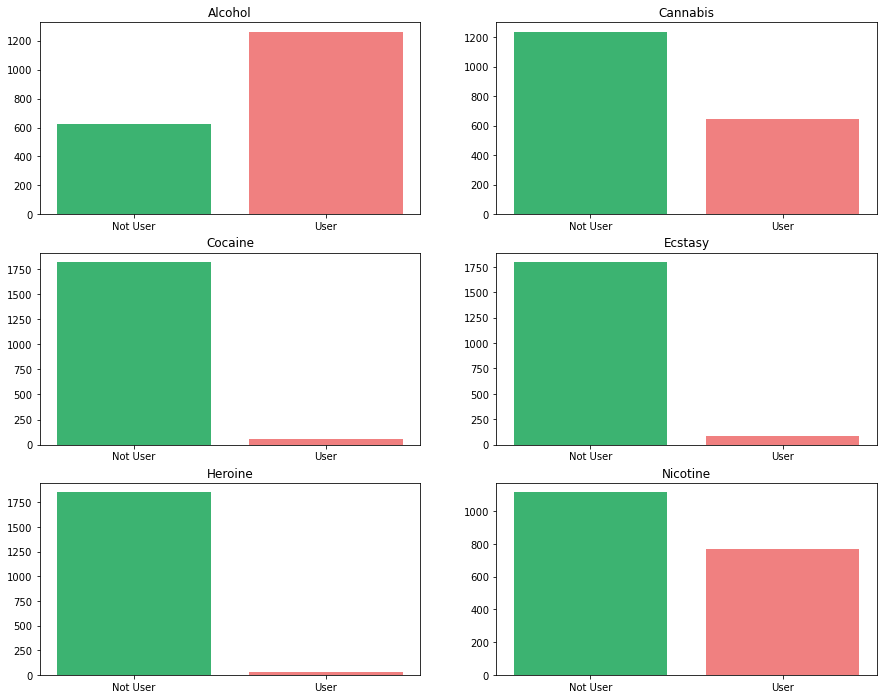

In [14]:
#visualize the distribution of the two classes for each drug
#x: User/Not user
#y: count of occurrences
labels = ['Not User','User']
x = [1,2]
fig,ax = plt.subplots(3,2,figsize=(15,12)) 
ax[0][0].bar(x,df['Alcohol'].value_counts(sort=False), tick_label = labels,color=['mediumseagreen','lightcoral'])
ax[0][0].set_title('Alcohol')
ax[0][1].bar(x,df['Cannabis'].value_counts(sort=False), tick_label = labels,color=['mediumseagreen','lightcoral'])
ax[0][1].set_title('Cannabis')
ax[1][0].bar(x,df['Cocaine'].value_counts(sort=False), tick_label = labels, color=['mediumseagreen','lightcoral'])
ax[1][0].set_title('Cocaine')
ax[1][1].bar(x,df['Ecstasy'].value_counts(sort=False), tick_label = labels, color=['mediumseagreen','lightcoral'])
ax[1][1].set_title('Ecstasy')
ax[2][0].bar(x,df['Heroine'].value_counts(sort=False), tick_label = labels, color=['mediumseagreen','lightcoral'])
ax[2][0].set_title('Heroine')
ax[2][1].bar(x,df['Nicotine'].value_counts(sort=False), tick_label = labels, color=['mediumseagreen','lightcoral'])
ax[2][1].set_title('Nicotine')

plt.savefig('DrugsDistribution.png', dpi=300, bbox_inches='tight')
plt.show()

We can see that it is a unbalanced analysis for all the drugs considered so there will be used some tools in order to avoid some biased predictions

In [15]:
#work only with the one for whch we have more data
df.drop('Cocaine',axis=1, inplace=True)
df.drop('Heroine',axis=1, inplace=True)
df.drop('Ecstasy',axis=1, inplace=True)

In [16]:
#Lets explore some features and organize them in a better way
#Gender

In [17]:
df['Gender'].value_counts()

-0.48246    943
 0.48246    941
Name: Gender, dtype: int64

In [18]:
def plot_distribution(labels,x,feature,x_size,y_size):
    fig,ax = plt.subplots(figsize=(x_size,y_size)) 
    ax.bar(x,df[feature].value_counts(), tick_label = labels, color='lightblue')
    ax.set_title(feature)
    plt.savefig(f'{feature}Distribution.png', dpi=300, bbox_inches='tight')

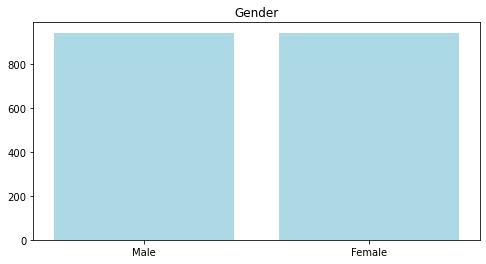

In [19]:
plot_distribution(['Male','Female'], [1,2],'Gender',8,4)

The gender feature is perfectly balanced so we have the same number of male and females partecipatig to the study.

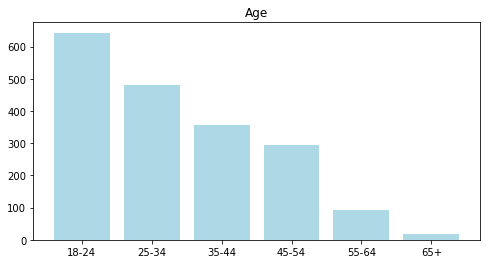

In [20]:
#Age distribution
labels=['18-24','25-34','35-44','45-54','55-64','65+']
plot_distribution(labels, [1,2,3,4,5,6],'Age',8,4)


The age is not distributed in a balanced way as expected. The majority of data is connected to the interval related to a younger age.
This is quite reasonable according to the subject analyzed.

-0.61113    506
 0.45468    480
 1.16365    283
-0.05921    269
-1.22751    100
-1.73790     99
 1.98437     89
-1.43719     30
-2.43591     28
Name: Education, dtype: int64


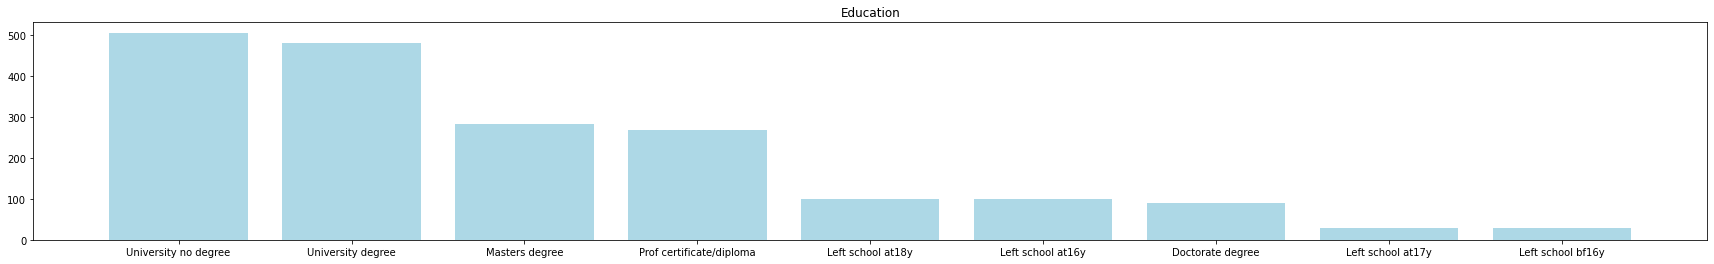

In [21]:
#Level of education
print(df['Education'].value_counts())
labels=['University no degree','University degree','Masters degree','Prof certificate/diploma','Left school at18y','Left school at16y','Doctorate degree','Left school at17y','Left school bf16y']

x=[1,2,3,4,5,6,7,8,9]
plot_distribution(labels, x,'Education',30,4)


The distribution of eduction level make us think that the partecipants have a quite high level of education so it can not be taken as an important features because the distribution is not balanced and we do not have samples of every level of eduction.

For this reason we decide to drop the column.

In [22]:
df = df.drop('Education', axis=1)

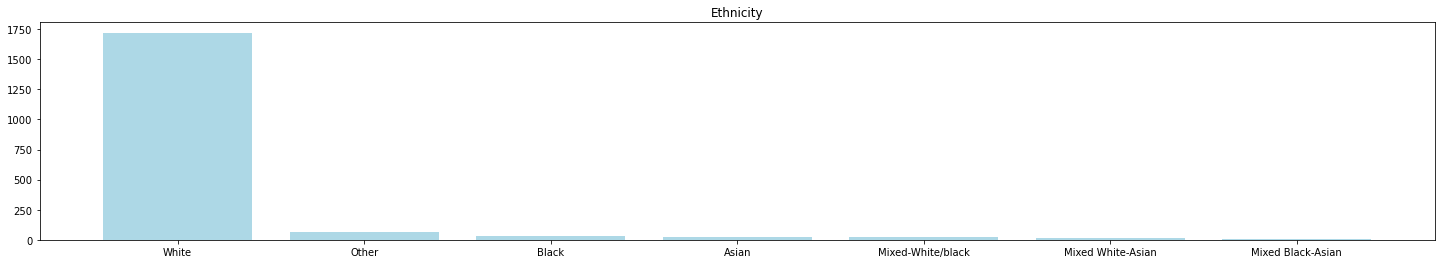

In [23]:
#Ethnicity
labels=['White','Other','Black','Asian','Mixed-White/black','Mixed White-Asian','Mixed Black-Asian']
x=[1,2,3,4,5,6,7]
plot_distribution(labels, x,'Ethnicity',25,4)


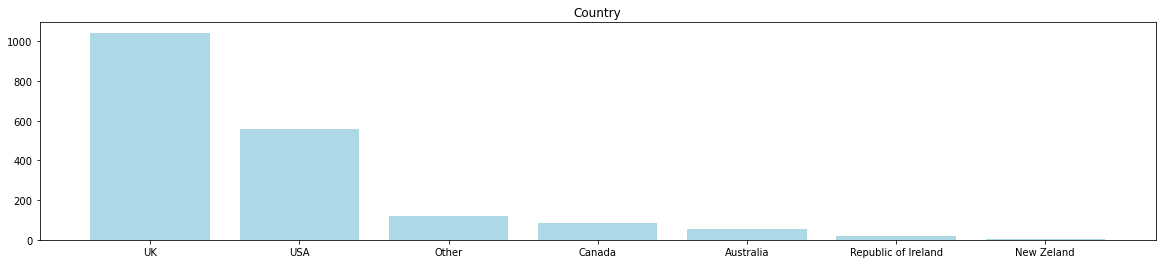

In [24]:
#country
df['Country'].value_counts()

labels=['UK','USA','Other','Canada','Australia','Republic of Ireland','New Zeland']
x=[1,2,3,4,5,6,7]
plot_distribution(labels, x,'Country',20,4)

The same thought can be done for the ethnicity and country

In [25]:
df = df.drop('Ethnicity', axis=1)
df = df.drop('Country', axis=1)

In [26]:
df

,Age,Gender,N,E,O,A,C,Impulsivness,SS,Alcohol,Cannabis,Nicotine
ID,,,,,,,,,,,,
2,-0.07854,-0.48246,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,0,0
3,0.49788,-0.48246,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,0,0
4,-0.95197,0.48246,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,0,0
5,0.49788,0.48246,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,0,0
6,2.59171,0.48246,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1884,-0.95197,0.48246,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,1,1,0
1885,-0.95197,-0.48246,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,1,0,1
1886,-0.07854,0.48246,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,0,1,1


After a first analysis of the dataset we were able to reasonably reduce the number of attributes from 20 to 17.

Now we can transform the data objects related to 'Age','Gender' in categorical data and then codify them with the dummy encoding.

In [27]:
#replace the values 

#gender: Female -->0
#        Male ---->1
def gender(n):
    if n>0:
        n=0
    elif n<0:
        n=1
    return n

df['Gender']= df['Gender'].map(gender)

In [28]:
df['Gender'].value_counts()

1    943
0    941
Name: Gender, dtype: int64

In [29]:
df

,Age,Gender,N,E,O,A,C,Impulsivness,SS,Alcohol,Cannabis,Nicotine
ID,,,,,,,,,,,,
2,-0.07854,1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,0,0
3,0.49788,1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,0,0
4,-0.95197,0,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,0,0
5,0.49788,0,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,0,0
6,2.59171,0,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1884,-0.95197,0,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,1,1,0
1885,-0.95197,1,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,1,0,1
1886,-0.07854,0,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,0,1,1


In [30]:
#age 

def age(n):
    if n==-0.9519700000000001:
        n='18-24'
    elif n ==-0.07854:
        n='25-34'
    elif n == 0.49788000000000004:
        n='35-44'
    elif n == 1.09449:
        n='45-54'
    elif n== 1.82213:
        n= '55-64'
    elif n==2.59171:
        n= '65+'
    return n

df['Age'] = df['Age'].map(age)

In [31]:
df['Age'].value_counts()

18-24    643
25-34    481
35-44    355
45-54    294
55-64     93
65+       18
Name: Age, dtype: int64

In [32]:
df

,Age,Gender,N,E,O,A,C,Impulsivness,SS,Alcohol,Cannabis,Nicotine
ID,,,,,,,,,,,,
2,25-34,1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,0,0
3,35-44,1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,0,0
4,18-24,0,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,0,0
5,35-44,0,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,0,0
6,65+,0,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1884,18-24,0,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,1,1,0
1885,18-24,1,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,1,0,1
1886,25-34,0,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,0,1,1


In [33]:
y = pd.get_dummies(df.Age, prefix='Age')

In [34]:
df = pd.concat([y,df],axis=1)
df.drop('Age', axis=1, inplace=True)
df

,Age_18-24,Age_25-34,Age_35-44,Age_45-54,Age_55-64,Age_65+,Gender,N,E,O,A,C,Impulsivness,SS,Alcohol,Cannabis,Nicotine
ID,,,,,,,,,,,,,,,,,
2,0,1,0,0,0,0,1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,0,0
3,0,0,1,0,0,0,1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,0,0
4,1,0,0,0,0,0,0,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,0,0
5,0,0,1,0,0,0,0,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,0,0
6,0,0,0,0,0,1,0,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,1,0,0,0,0,0,0,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,1,1,0
1885,1,0,0,0,0,0,1,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,1,0,1
1886,0,1,0,0,0,0,0,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,0,1,1


The number of columns now is equal to 22 given that we applied one-hot-encoding for the age feature

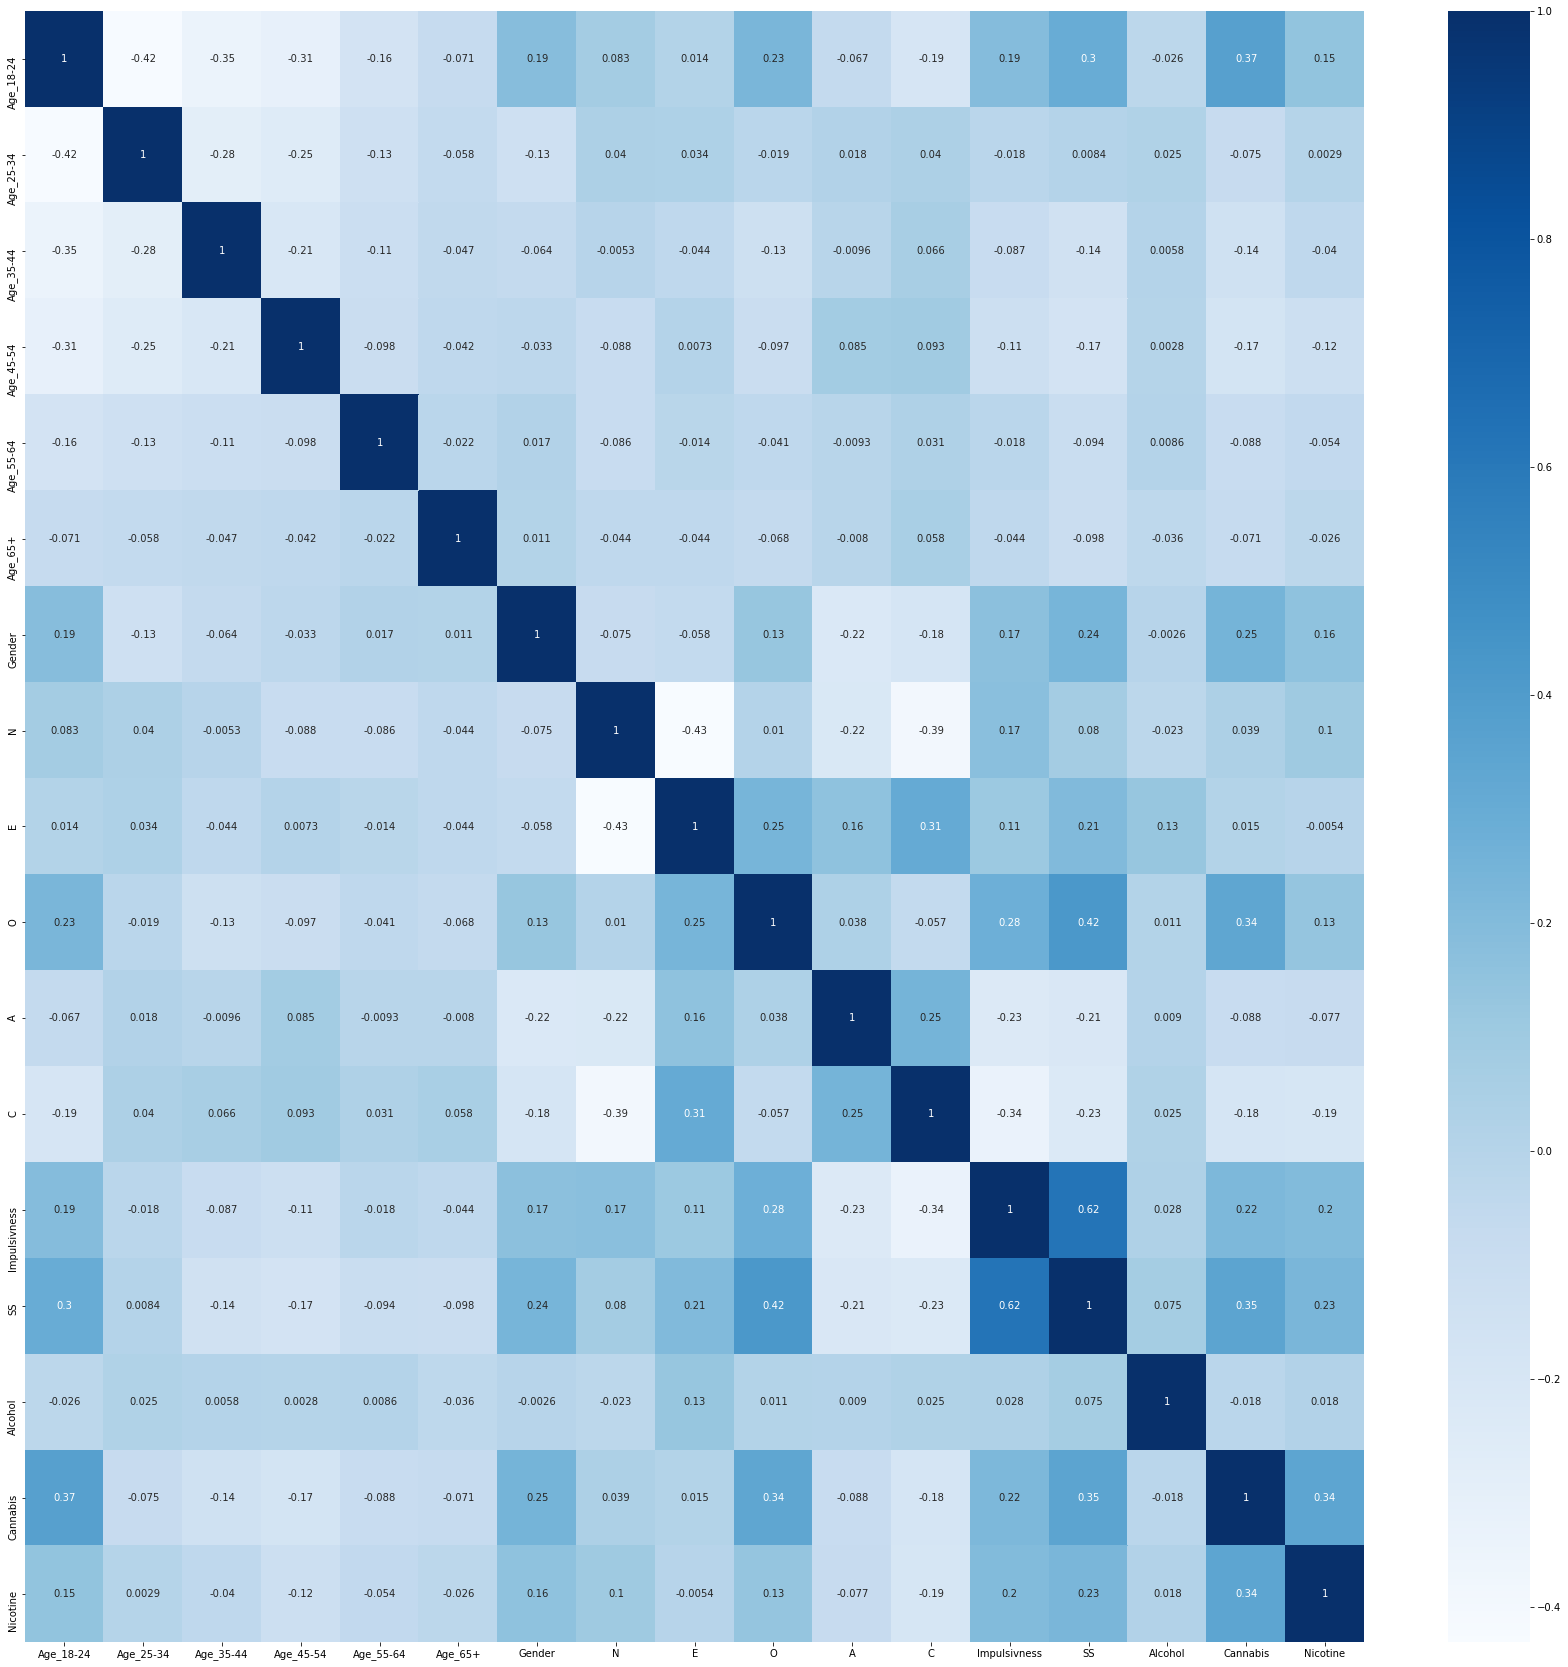

In [35]:
##### FEATURE CORRELATION
plt.figure(figsize=(30,30))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap='Blues')
plt.savefig('ConfusionMatrix.png', dpi=300, bbox_inches='tight')
plt.show()


In [36]:
########STANDARDIZATION
feat_tobe_stand=['N','E','O','A','C','Impulsivness','SS']
(df[feat_tobe_stand]).describe()

,N,E,O,A,C,Impulsivness,SS
count,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000
mean,-0.000119,0.000143,-0.000225,0.000242,-0.000383,0.007335,-0.002667
std,0.998345,0.997625,0.996402,0.997481,0.997787,0.954674,0.963575
min,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [37]:
#STANDARD SCALER

scaler = StandardScaler()
labels_to_stand=['N','E','O','A','C','Impulsivness','SS']
scaler.fit(df[labels_to_stand])
other_features=['Age_18-24','Age_25-34','Age_35-44','Age_45-54','Age_55-64','Age_65+','Gender','Alcohol','Cannabis','Nicotine']
arr_other_features = (df[other_features]).to_numpy()

X_scal = scaler.transform(df[labels_to_stand])
X_scal = np.concatenate([arr_other_features,X_scal],axis=1)
df_scal = pd.DataFrame(X_scal, columns=['Age_18-24','Age_25-34','Age_35-44','Age_45-54','Age_55-64','Age_65+','Gender','Alcohol','Cannabis','Nicotine','N','E','O','A','C','Impulsivness','SS'])
print(df_scal.describe())

         Age_18-24    Age_25-34    Age_35-44    Age_45-54    Age_55-64  \
count  1884.000000  1884.000000  1884.000000  1884.000000  1884.000000   
mean      0.341295     0.255308     0.188429     0.156051     0.049363   
std       0.474270     0.436150     0.391158     0.363000     0.216682   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     1.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

           Age_65+       Gender      Alcohol     Cannabis     Nicotine  \
count  1884.000000  1884.000000  1884.000000  1884.000000  1884.000000   
mean      0.009554     0.500531     0.670382     0.343949     0.407113   
std       0.097303     0.500132     0.470199     0.475150     0.491427   
min       0.000000     0.000000     0

In [38]:
df_scal[['N','Alcohol']]

,N,Alcohol
0,-0.679435,1.0
1,-0.468029,1.0
2,-0.148987,0.0
3,0.736985,0.0
4,-0.679435,0.0
...,...,...
1879,-1.196478,1.0
1880,-0.246845,1.0
1881,1.135109,0.0
1882,0.912802,1.0


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

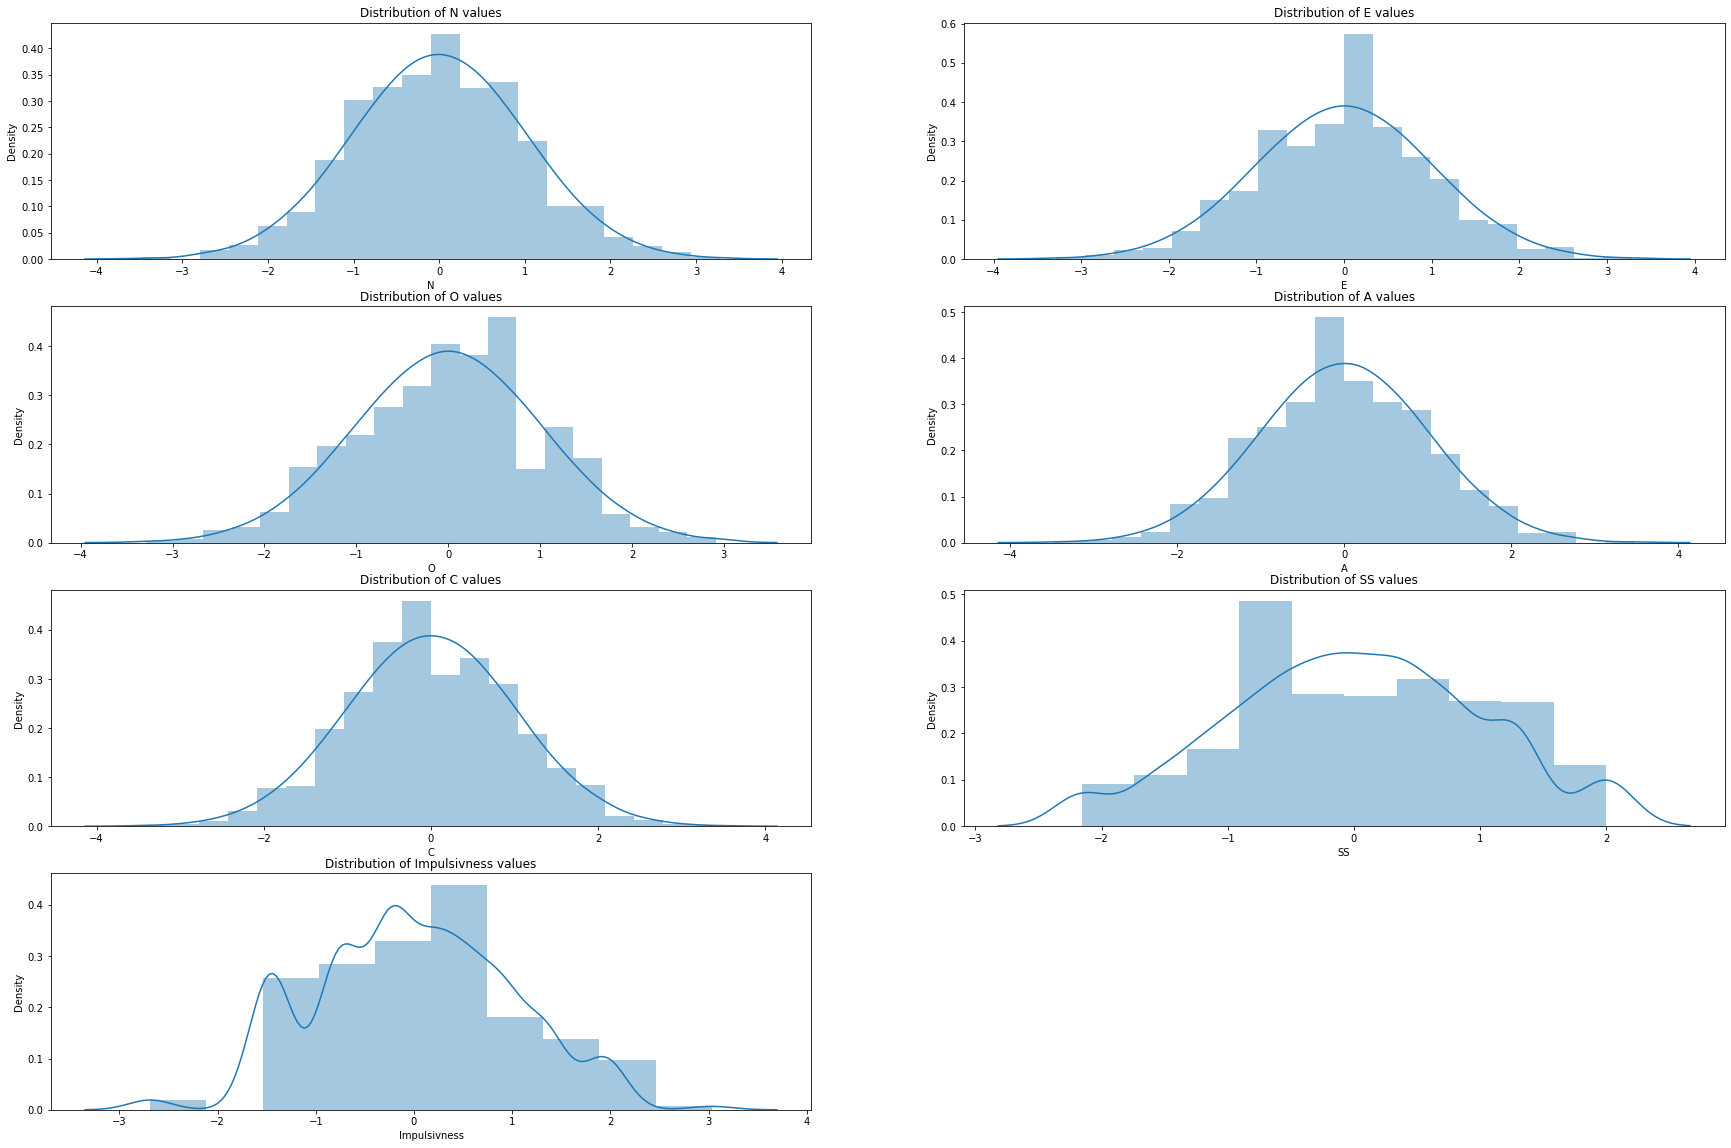

In [39]:
f,axs=plt.subplots(figsize=(30,20),nrows=4,ncols=2)
sns.distplot(df_scal.N,bins=20,ax=axs[0][0])
axs[0][0].set_title('Distribution of N values')
sns.distplot(df_scal.E,bins=20,ax=axs[0][1])
axs[0][1].set_title('Distribution of E values')
sns.distplot(df_scal.O,bins=20,ax=axs[1][0])
axs[1][0].set_title('Distribution of O values')
sns.distplot(df_scal.A,bins=20,ax=axs[1][1])
axs[1][1].set_title('Distribution of A values')
sns.distplot(df_scal.C,bins=20,ax=axs[2][0])
axs[2][0].set_title('Distribution of C values')
sns.distplot(df_scal.SS,bins=10,ax=axs[2][1])
axs[2][1].set_title('Distribution of SS values')
sns.distplot(df_scal.Impulsivness,bins=10,ax=axs[3][0])
axs[3][0].set_title('Distribution of Impulsivness values')
axs[3, 1].set_axis_off() 

<ipython-input-40-e4835c7e7daa>:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  users=pd.Series()


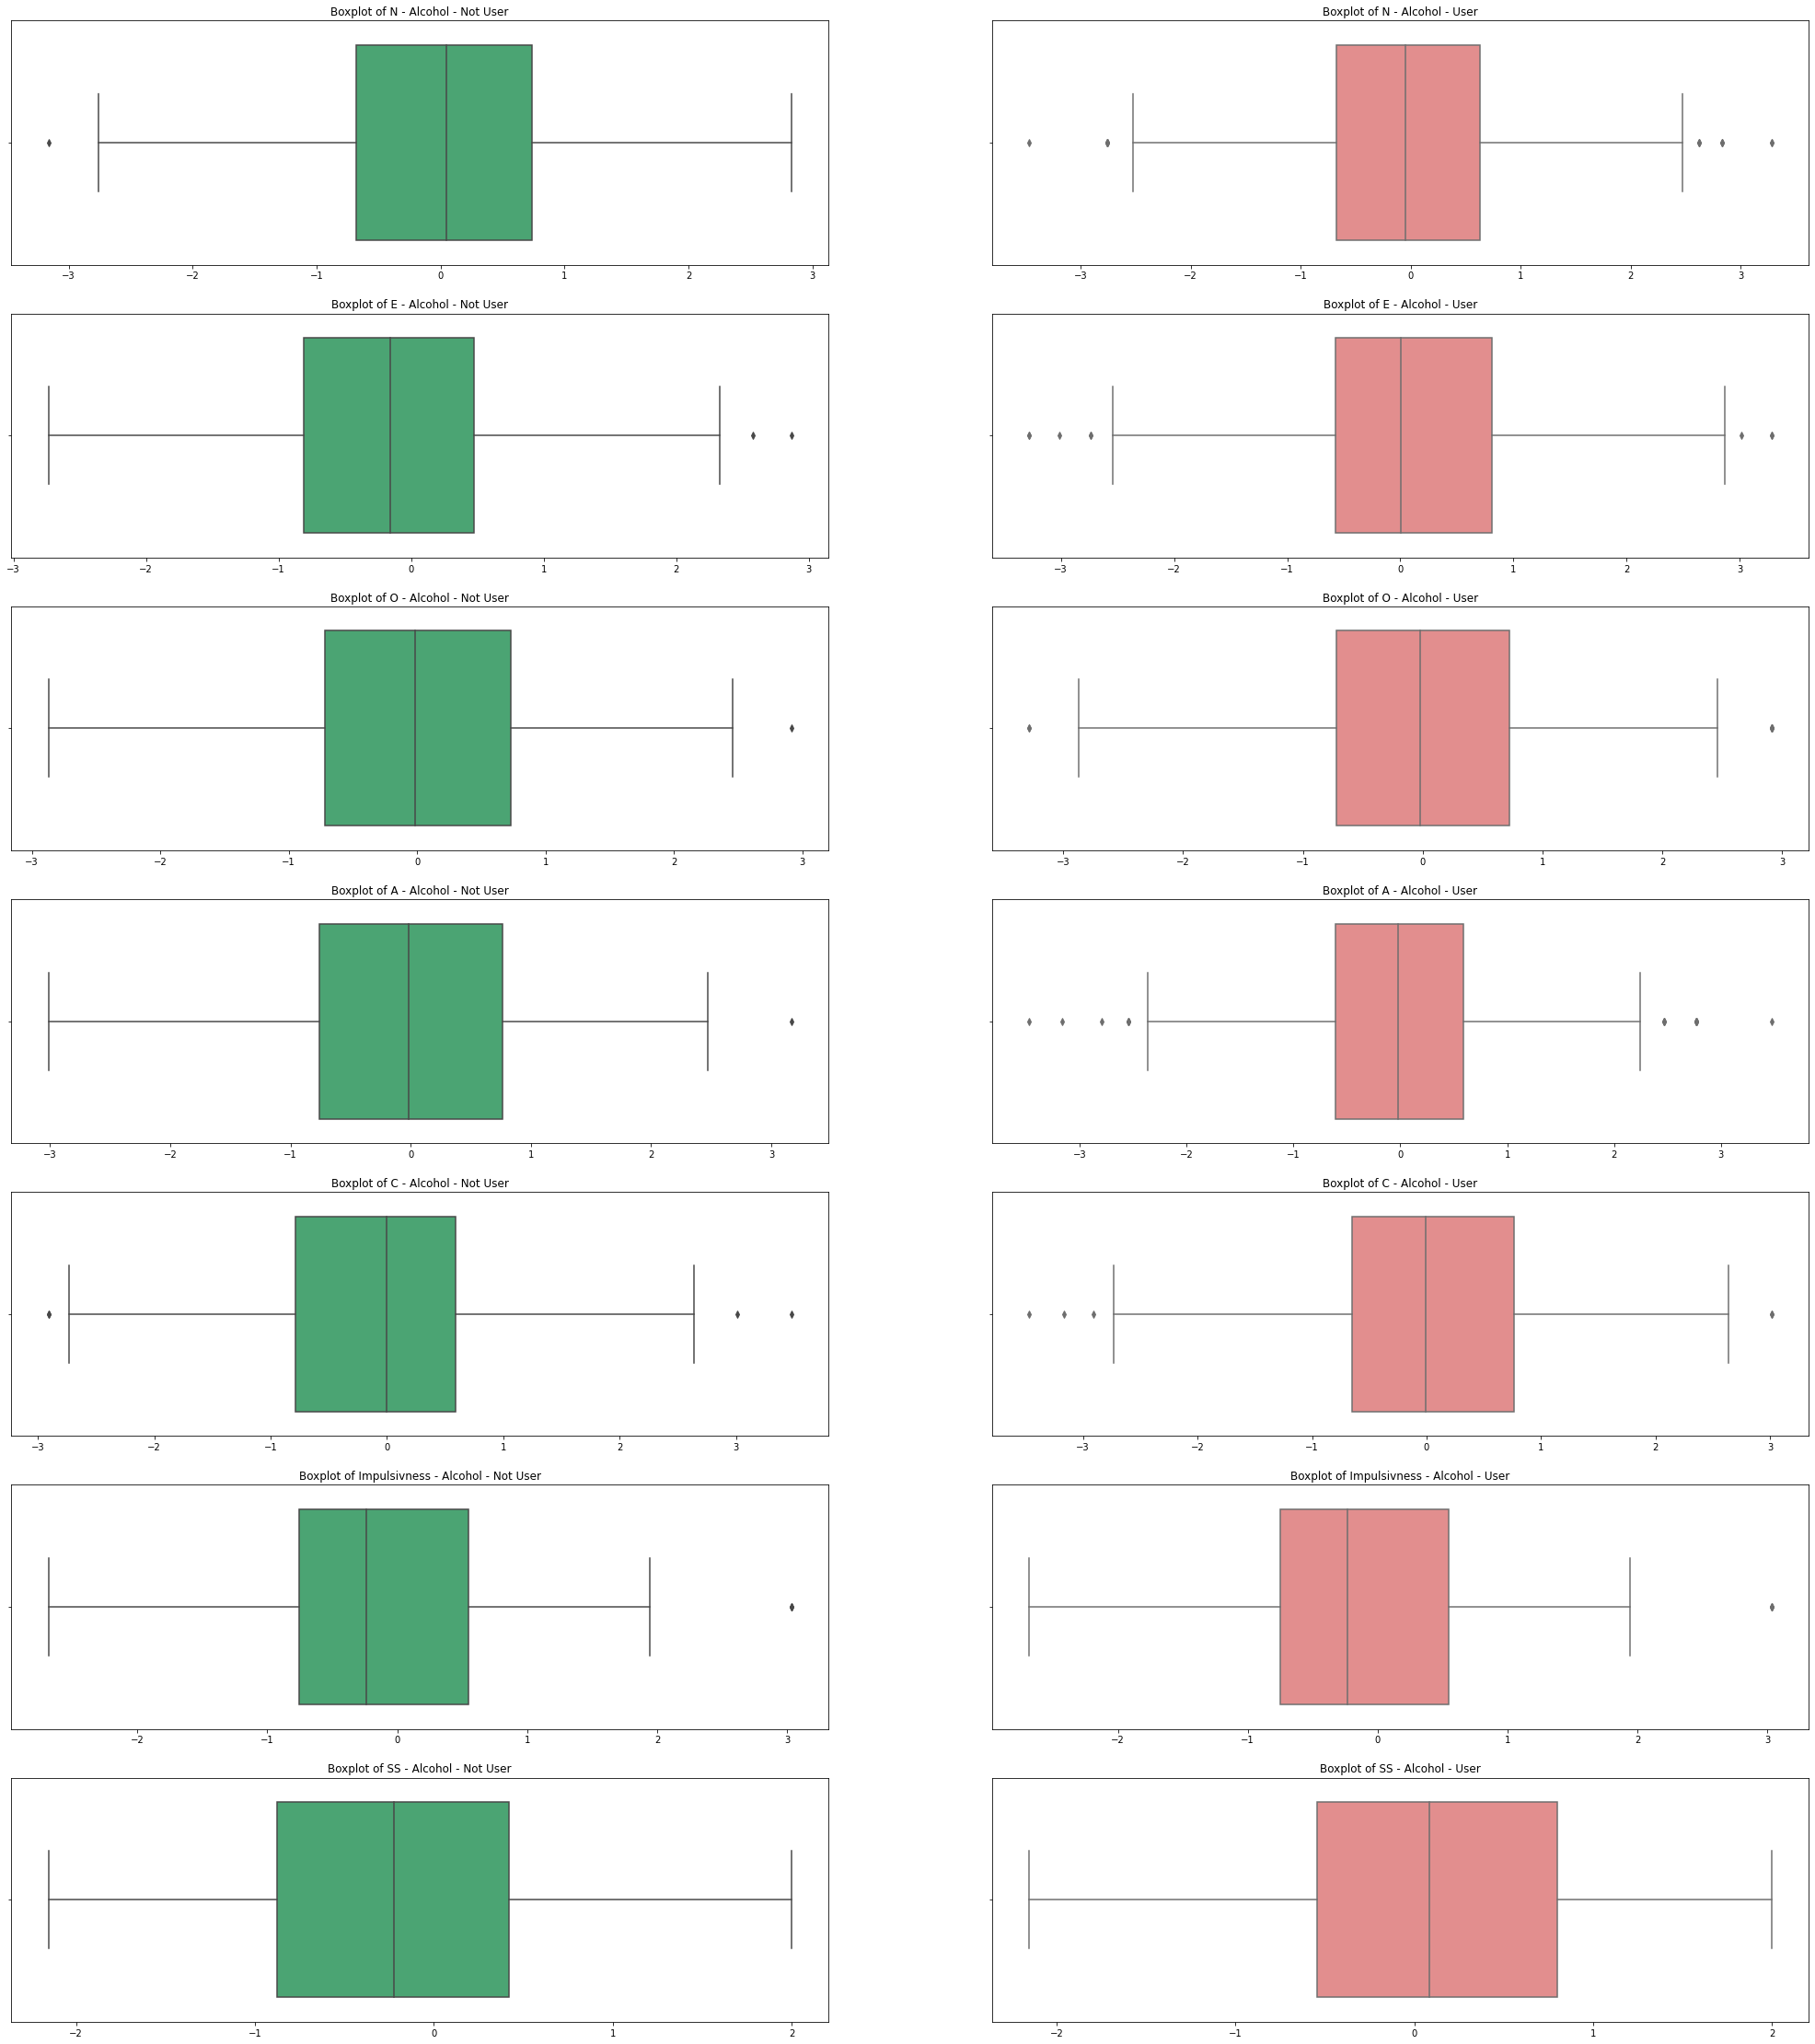

In [40]:
#Outliers detection
############ just an exmple with alcohol
fig, axs = plt.subplots(ncols=2,nrows=7,figsize=(35,40))
users=pd.Series()
def box_plot(dataset,feature,x,y,drug):
    sns.boxplot(x=(dataset.loc[dataset[drug] == 0, feature]),ax=axs[x][y],color='mediumseagreen')
    axs[x][y].set_title(f'Boxplot of {feature} - {drug} - Not User')
    sns.boxplot(x=(dataset.loc[dataset[drug] == 1, feature]),ax=axs[x][y+1],color='lightcoral')
    axs[x][y+1].set_title(f'Boxplot of {feature} - {drug} - User')
    axs[x][y+1].set(xlabel=None)
    axs[x][y].set(xlabel=None)
    #axs[3, 1].set_axis_off() 
    
                
box_plot(df_scal,'N',0,0,'Alcohol')
box_plot(df_scal,'E',1,0,'Alcohol')
box_plot(df_scal,'O',2,0,'Alcohol')
box_plot(df_scal,'A',3,0,'Alcohol')
box_plot(df_scal,'C',4,0,'Alcohol')
box_plot(df_scal,'Impulsivness',5,0,'Alcohol')
box_plot(df_scal,'SS',6,0,'Alcohol')

plt.savefig('BoxplotsBefore_Alcohol.png', dpi=300, bbox_inches='tight')

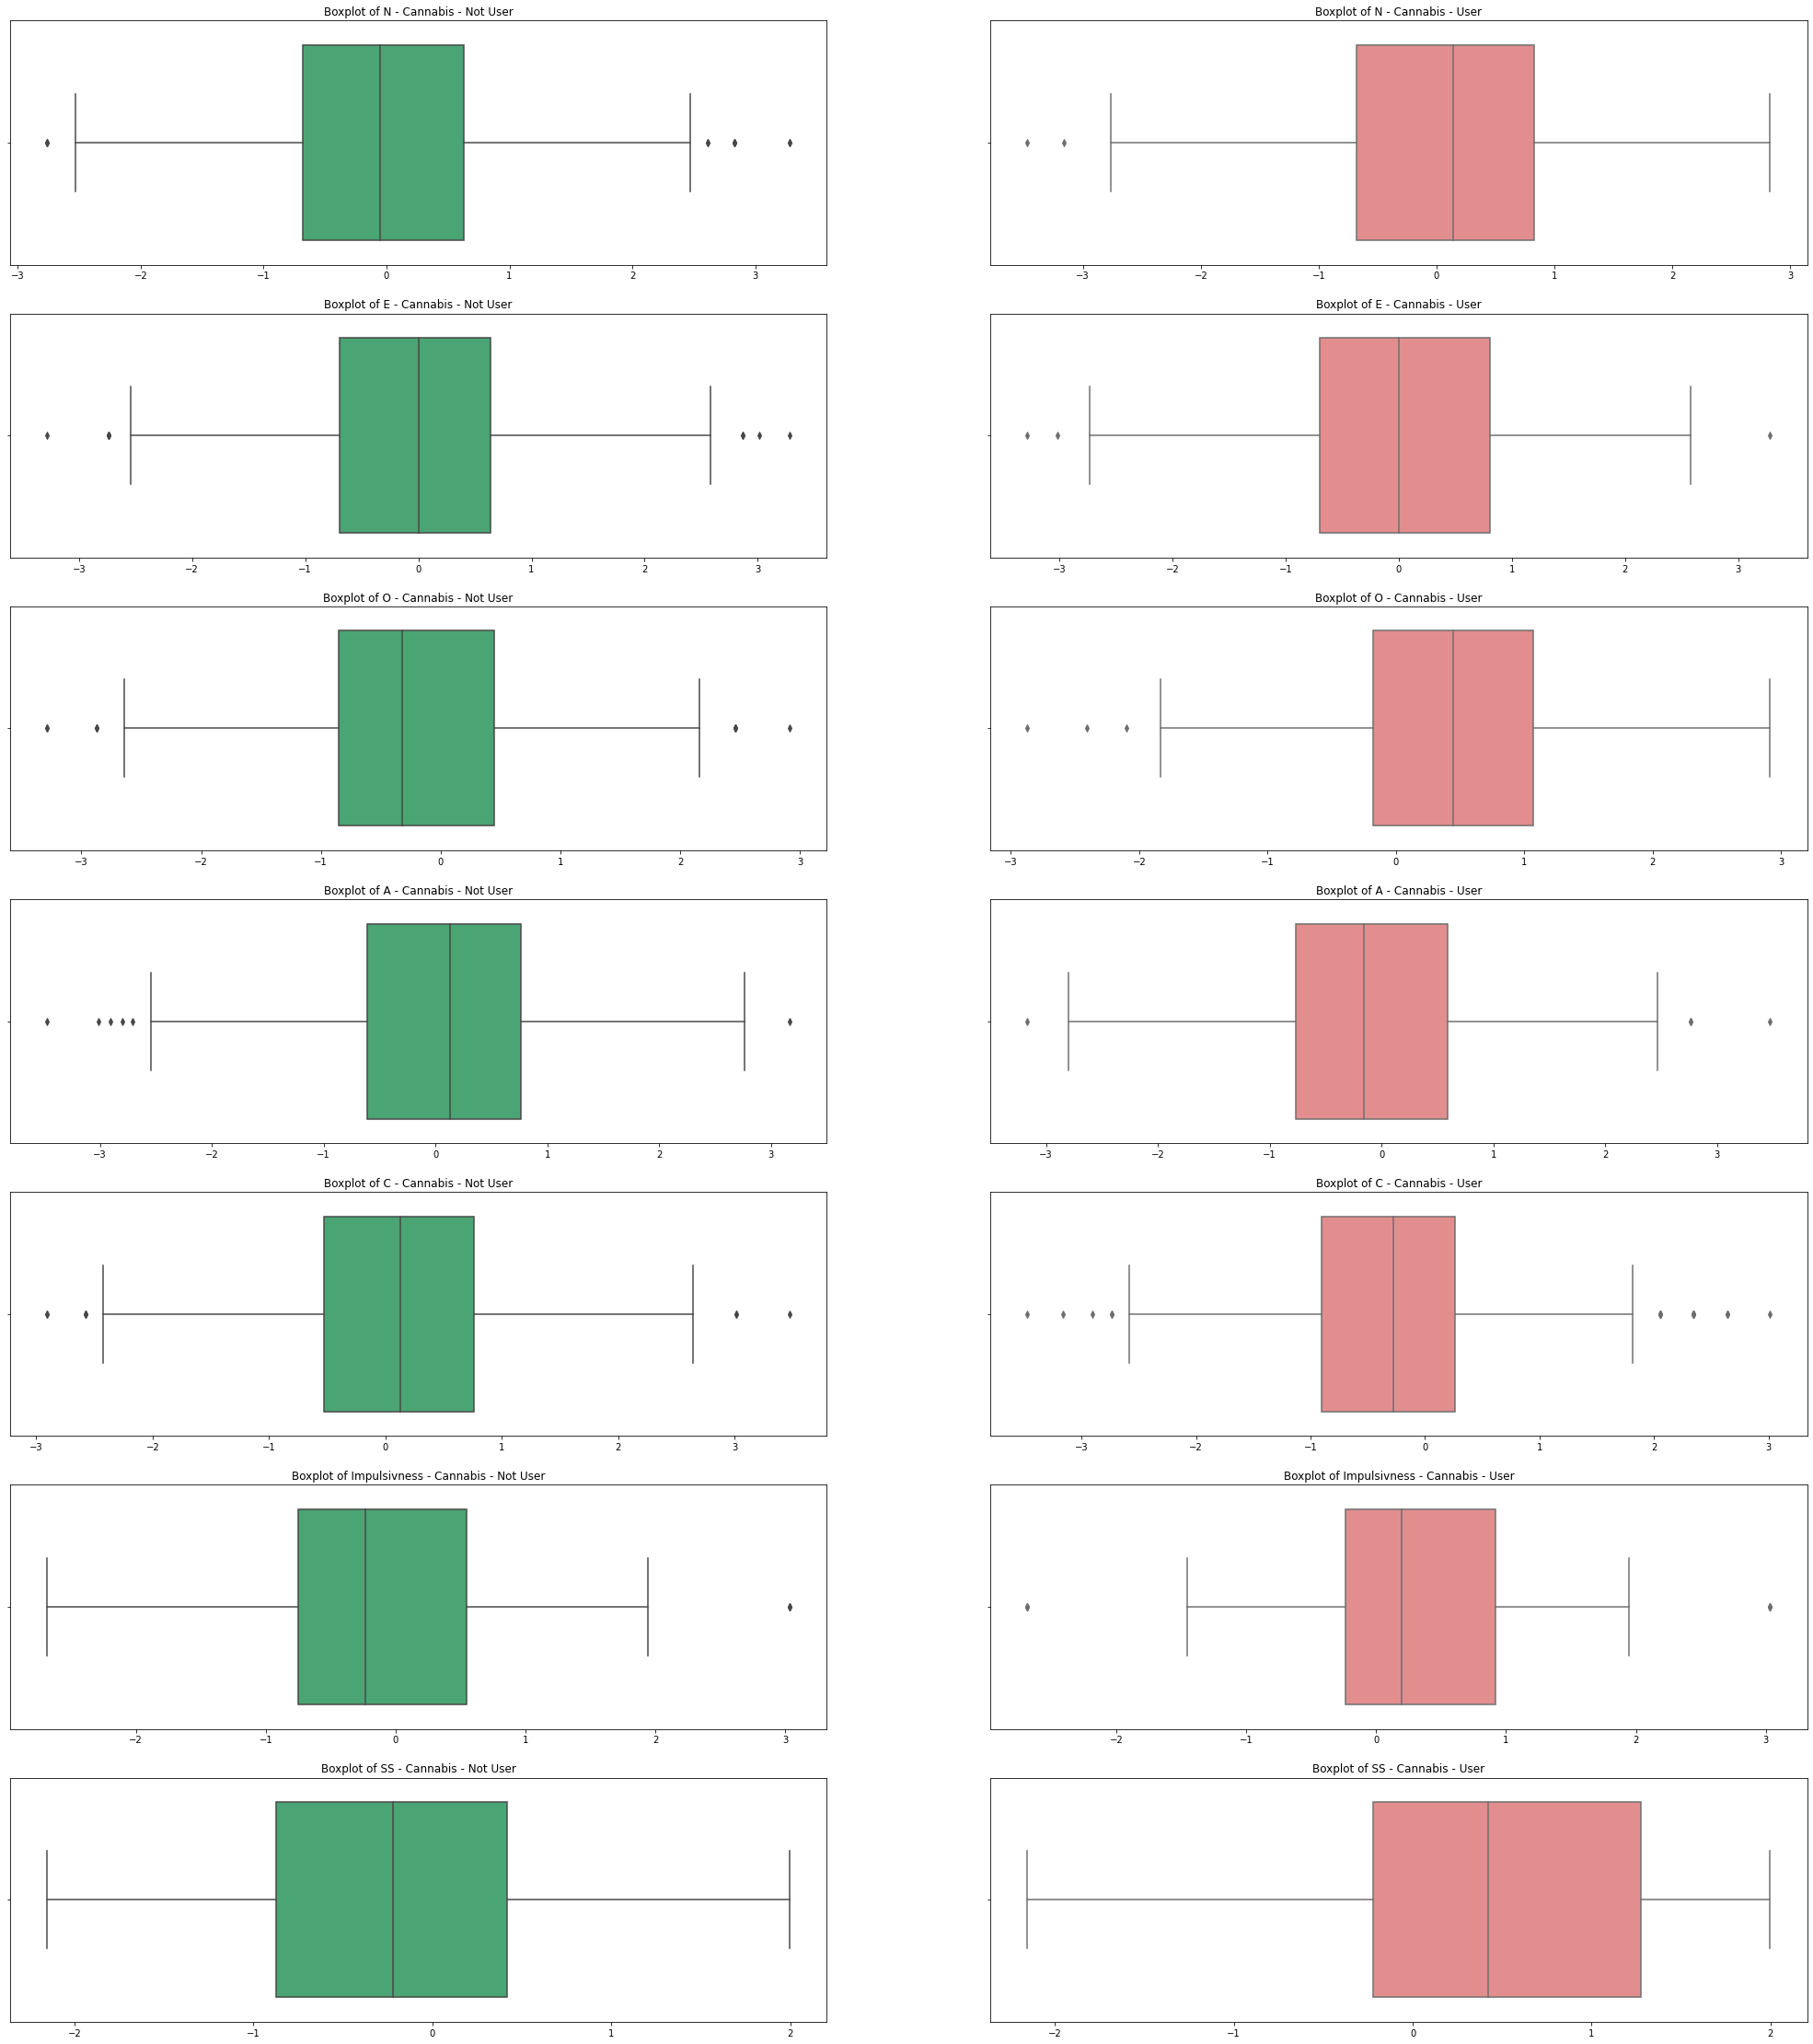

In [41]:
fig, axs = plt.subplots(ncols=2,nrows=7,figsize=(35,40))

box_plot(df_scal,'N',0,0,'Cannabis')
box_plot(df_scal,'E',1,0,'Cannabis')
box_plot(df_scal,'O',2,0,'Cannabis')
box_plot(df_scal,'A',3,0,'Cannabis')
box_plot(df_scal,'C',4,0,'Cannabis')
box_plot(df_scal,'Impulsivness',5,0,'Cannabis')
box_plot(df_scal,'SS',6,0,'Cannabis')
plt.savefig('BoxplotsBefore_Cannabis.png', dpi=300, bbox_inches='tight')

In [42]:
#OUTLIERS z score
z = np.abs(stats.zscore(df_scal))
threshold = 2.5
df_scal_o = df_scal[(z <= threshold).all(axis=1)]
print(df_scal.shape)
print(df_scal_o.shape)

(1884, 17)
(1648, 17)


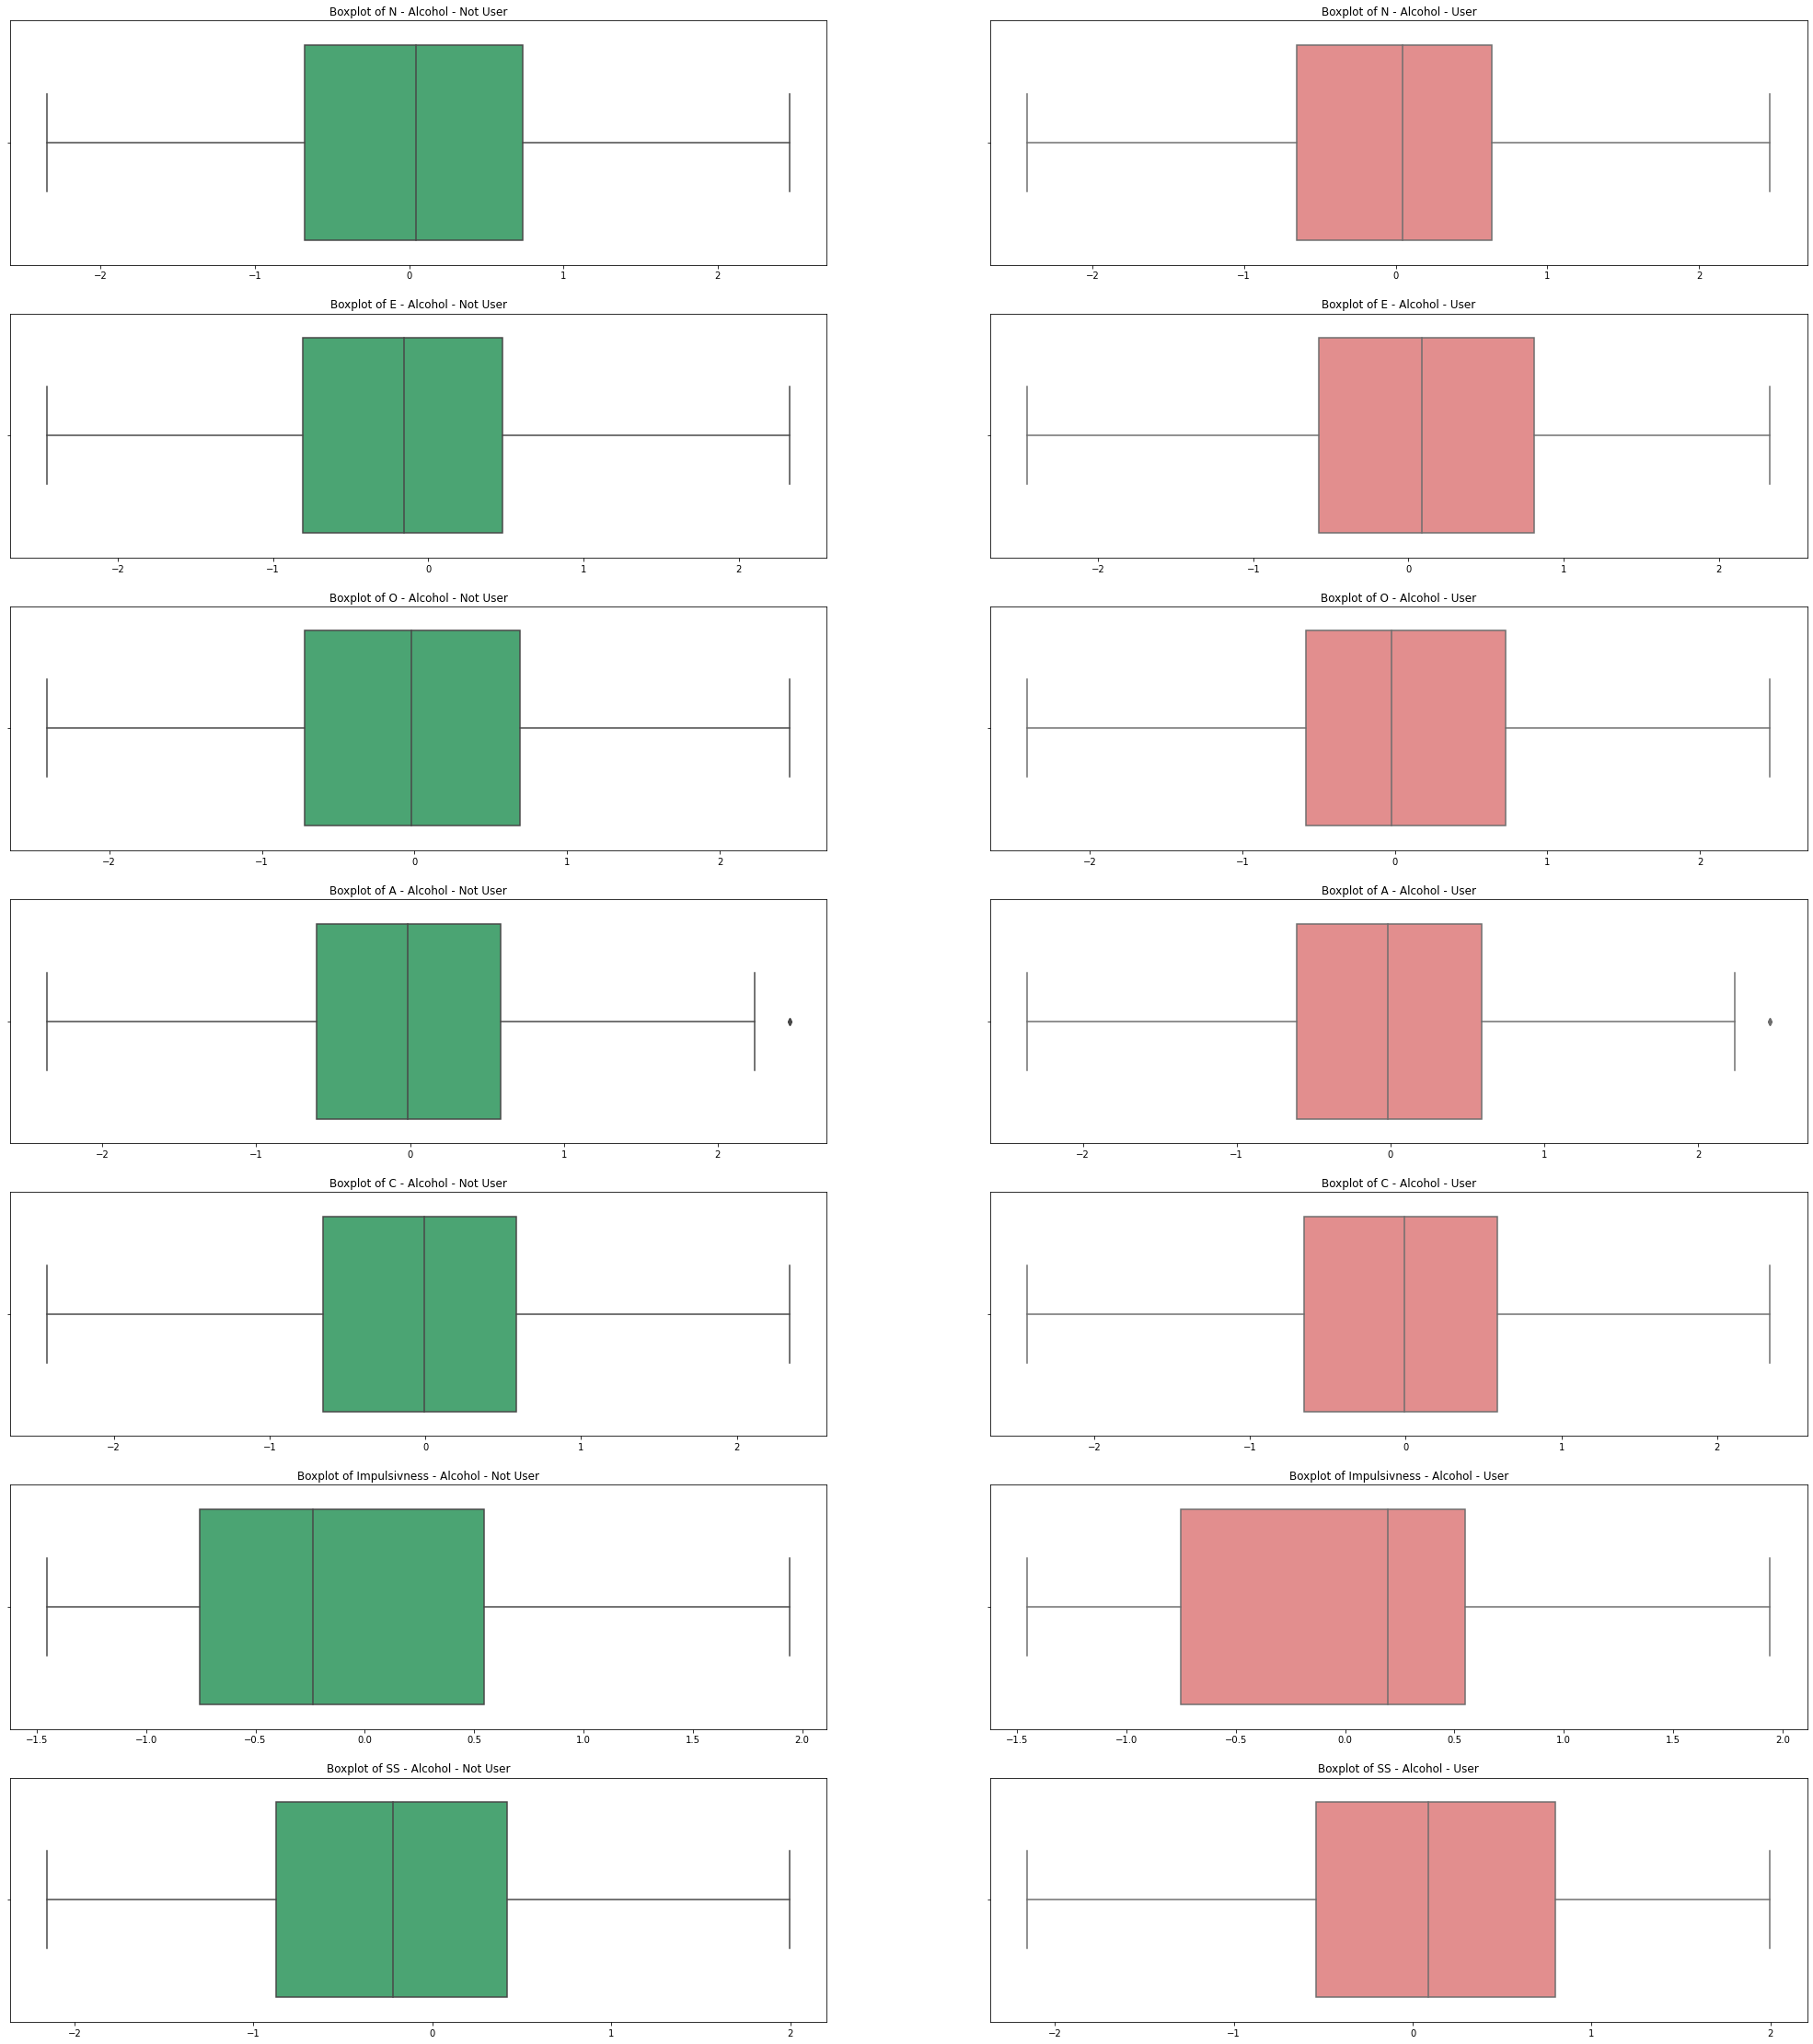

In [43]:
fig, axs = plt.subplots(ncols=2,nrows=7,figsize=(35,40))
box_plot(df_scal_o,'N',0,0,'Alcohol')
box_plot(df_scal_o,'E',1,0,'Alcohol')
box_plot(df_scal_o,'O',2,0,'Alcohol')
box_plot(df_scal_o,'A',3,0,'Alcohol')
box_plot(df_scal_o,'C',4,0,'Alcohol')
box_plot(df_scal_o,'Impulsivness',5,0,'Alcohol')
box_plot(df_scal_o,'SS',6,0,'Alcohol')
plt.savefig('BoxplotsAfter_Alcohol.png', dpi=300, bbox_inches='tight')

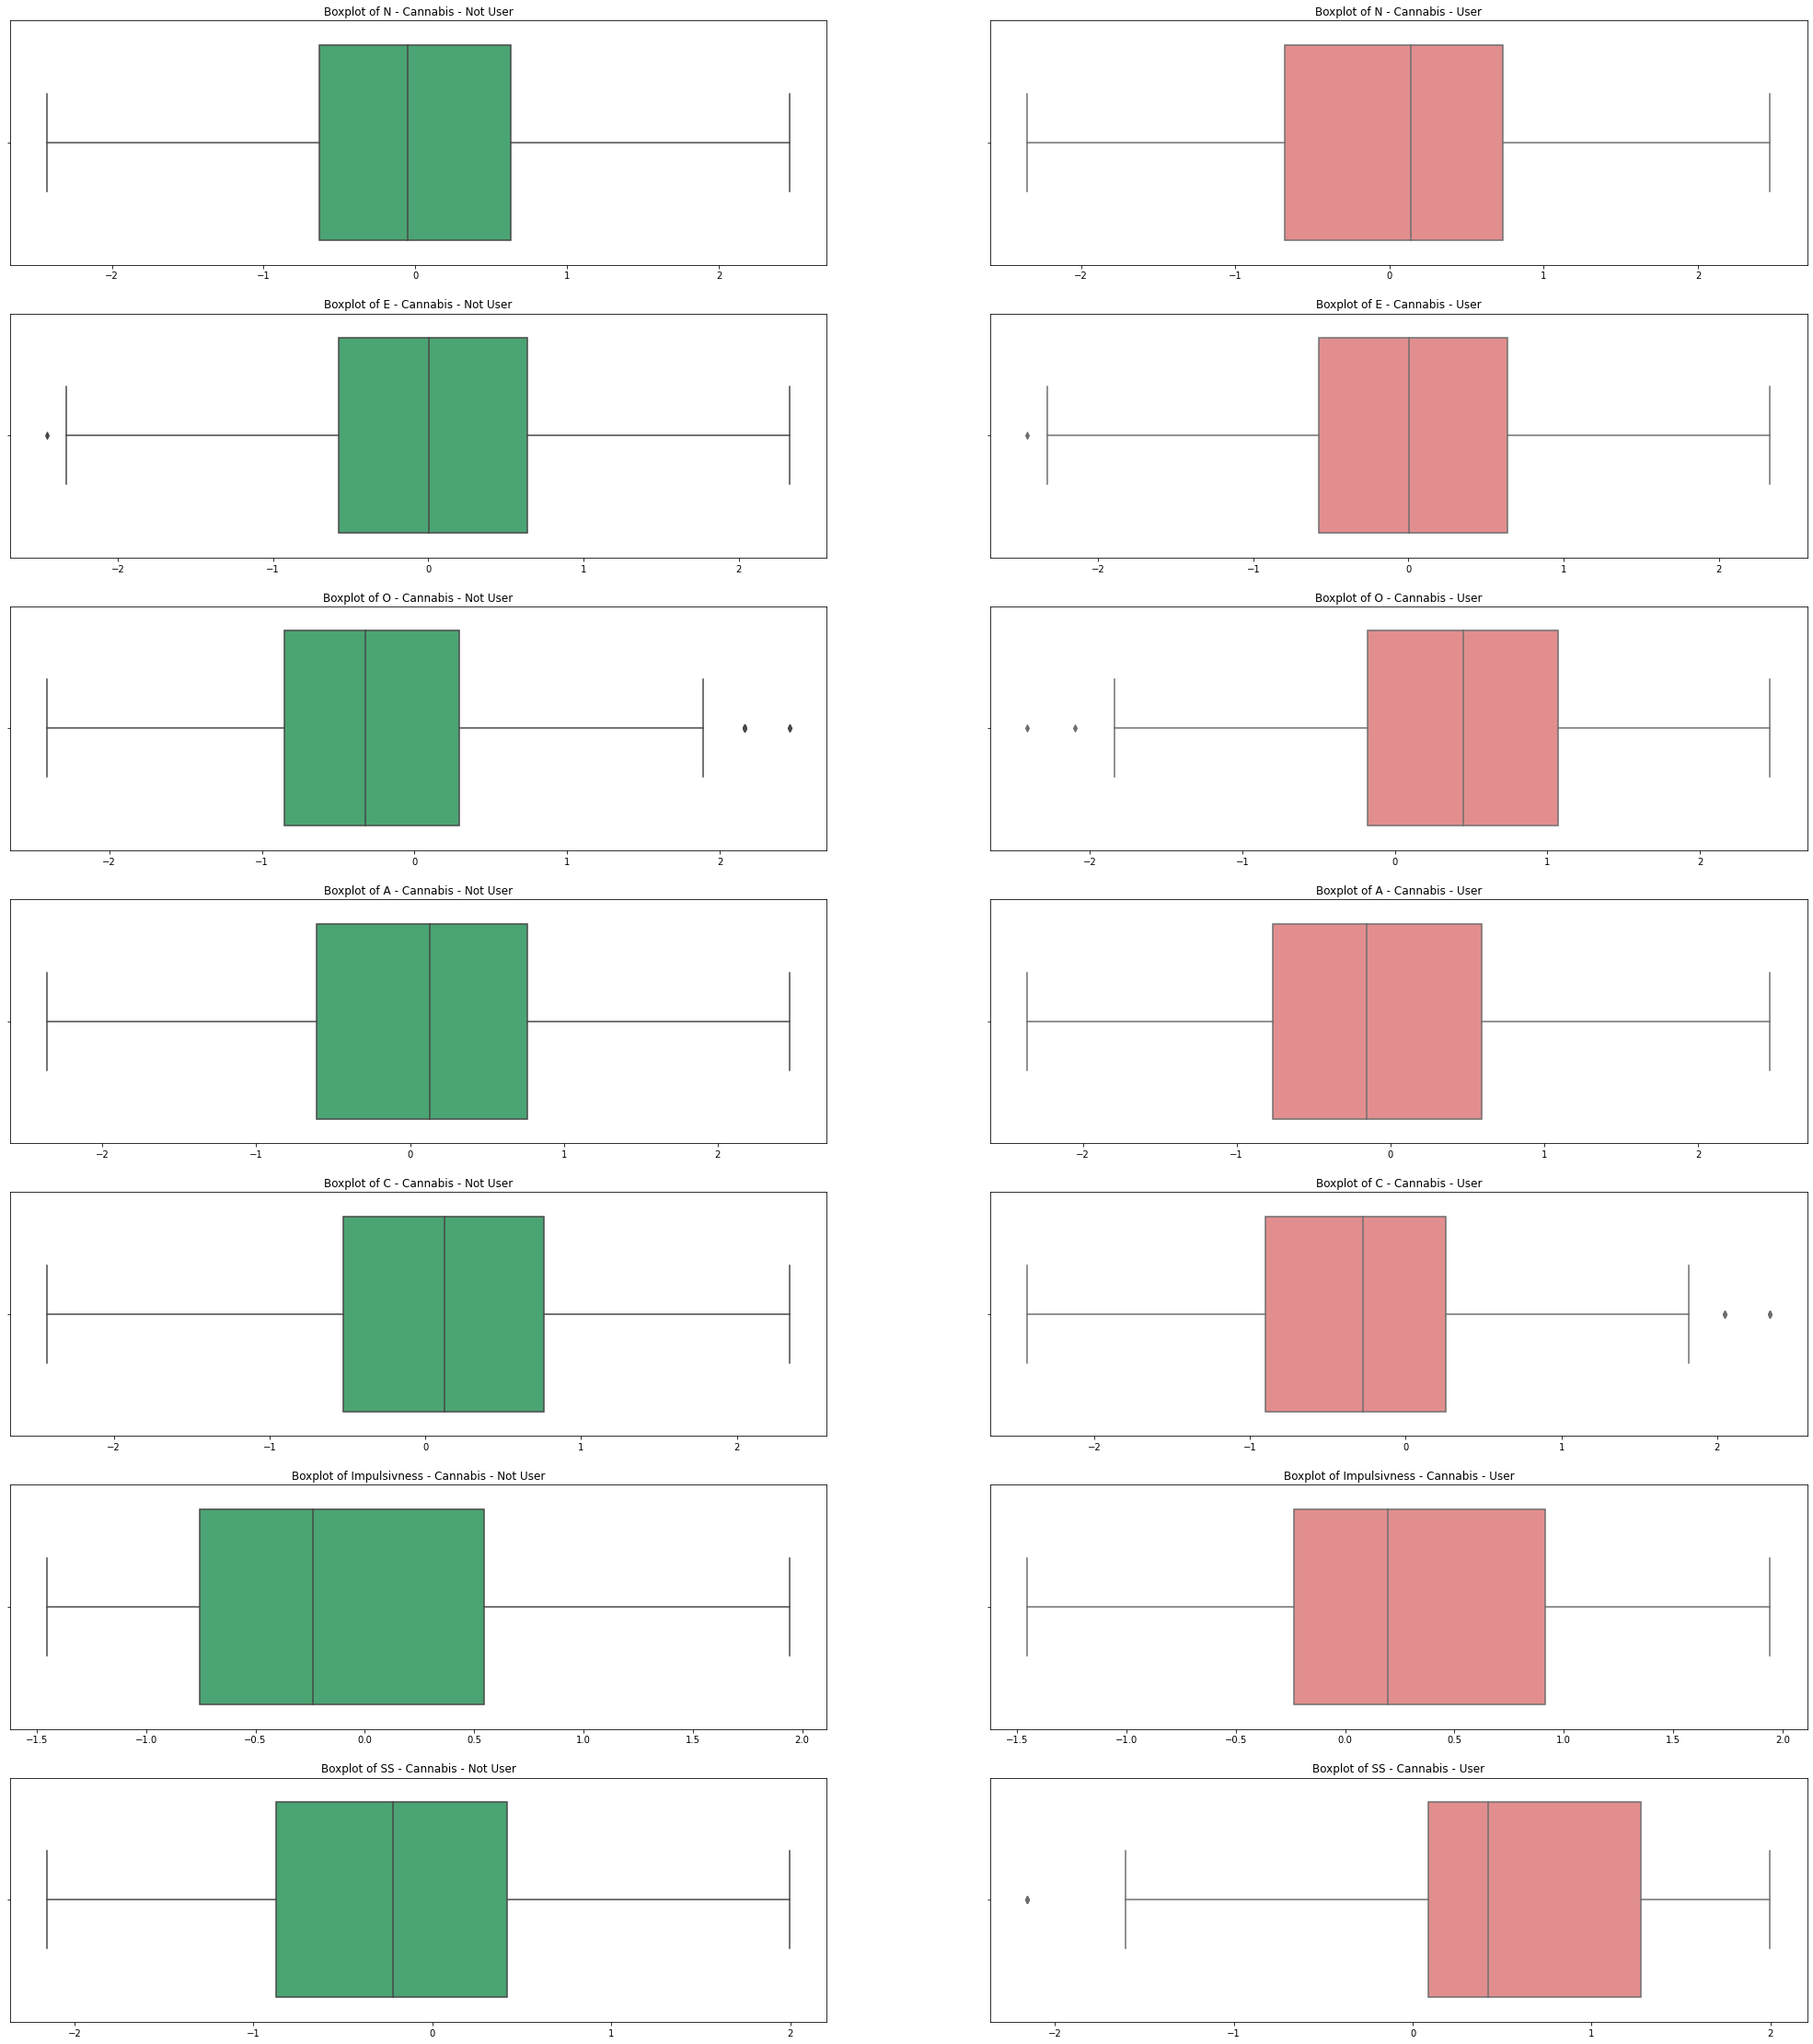

In [44]:
fig, axs = plt.subplots(ncols=2,nrows=7,figsize=(35,40))
box_plot(df_scal_o,'N',0,0,'Cannabis')
box_plot(df_scal_o,'E',1,0,'Cannabis')
box_plot(df_scal_o,'O',2,0,'Cannabis')
box_plot(df_scal_o,'A',3,0,'Cannabis')
box_plot(df_scal_o,'C',4,0,'Cannabis')
box_plot(df_scal_o,'Impulsivness',5,0,'Cannabis')
box_plot(df_scal_o,'SS',6,0,'Cannabis')
plt.savefig('BoxplotsAfter_Cannabis.png', dpi=300, bbox_inches='tight')

In [45]:
df_scal_o = df_scal_o.astype({'Age_18-24': 'int64', 'Age_25-34':'int64','Age_35-44': 'int64','Age_45-54': 'int64',
                         'Age_55-64': 'int64', 'Age_65+':'int64', 'Gender': 'int64','Alcohol': 'int64',
                         'Cannabis': 'int64', 'Nicotine': 'int64'})


In [46]:
X=df_scal_o.drop(['Alcohol','Cannabis','Nicotine'], axis='columns')
y=df_scal_o.drop(['Age_18-24','Age_25-34','Age_35-44','Age_45-54','Age_55-64','Age_65+','Gender','N','E','O','A','C','Impulsivness','SS'],axis='columns')


In [47]:
#ISOLATION FOREST
isolation_forest = IsolationForest(contamination=0.1)
anomalies=isolation_forest.fit_predict(X)
X_iso=X.iloc[anomalies==1]
y_iso=y.iloc[anomalies==1]

print('Length after outlier removal with Isolation Forest',len(X_iso))
df_iso_arr = np.concatenate([X_iso,y_iso],axis=1)
df_iso = pd.DataFrame(df_iso_arr, columns=['Age_18-24','Age_25-34','Age_35-44','Age_45-54','Age_55-64','Age_65+','Gender','N','E','O','A','C','Impulsivness','SS','Alcohol','Cannabis','Nicotine'])

Length after outlier removal with Isolation Forest 1483


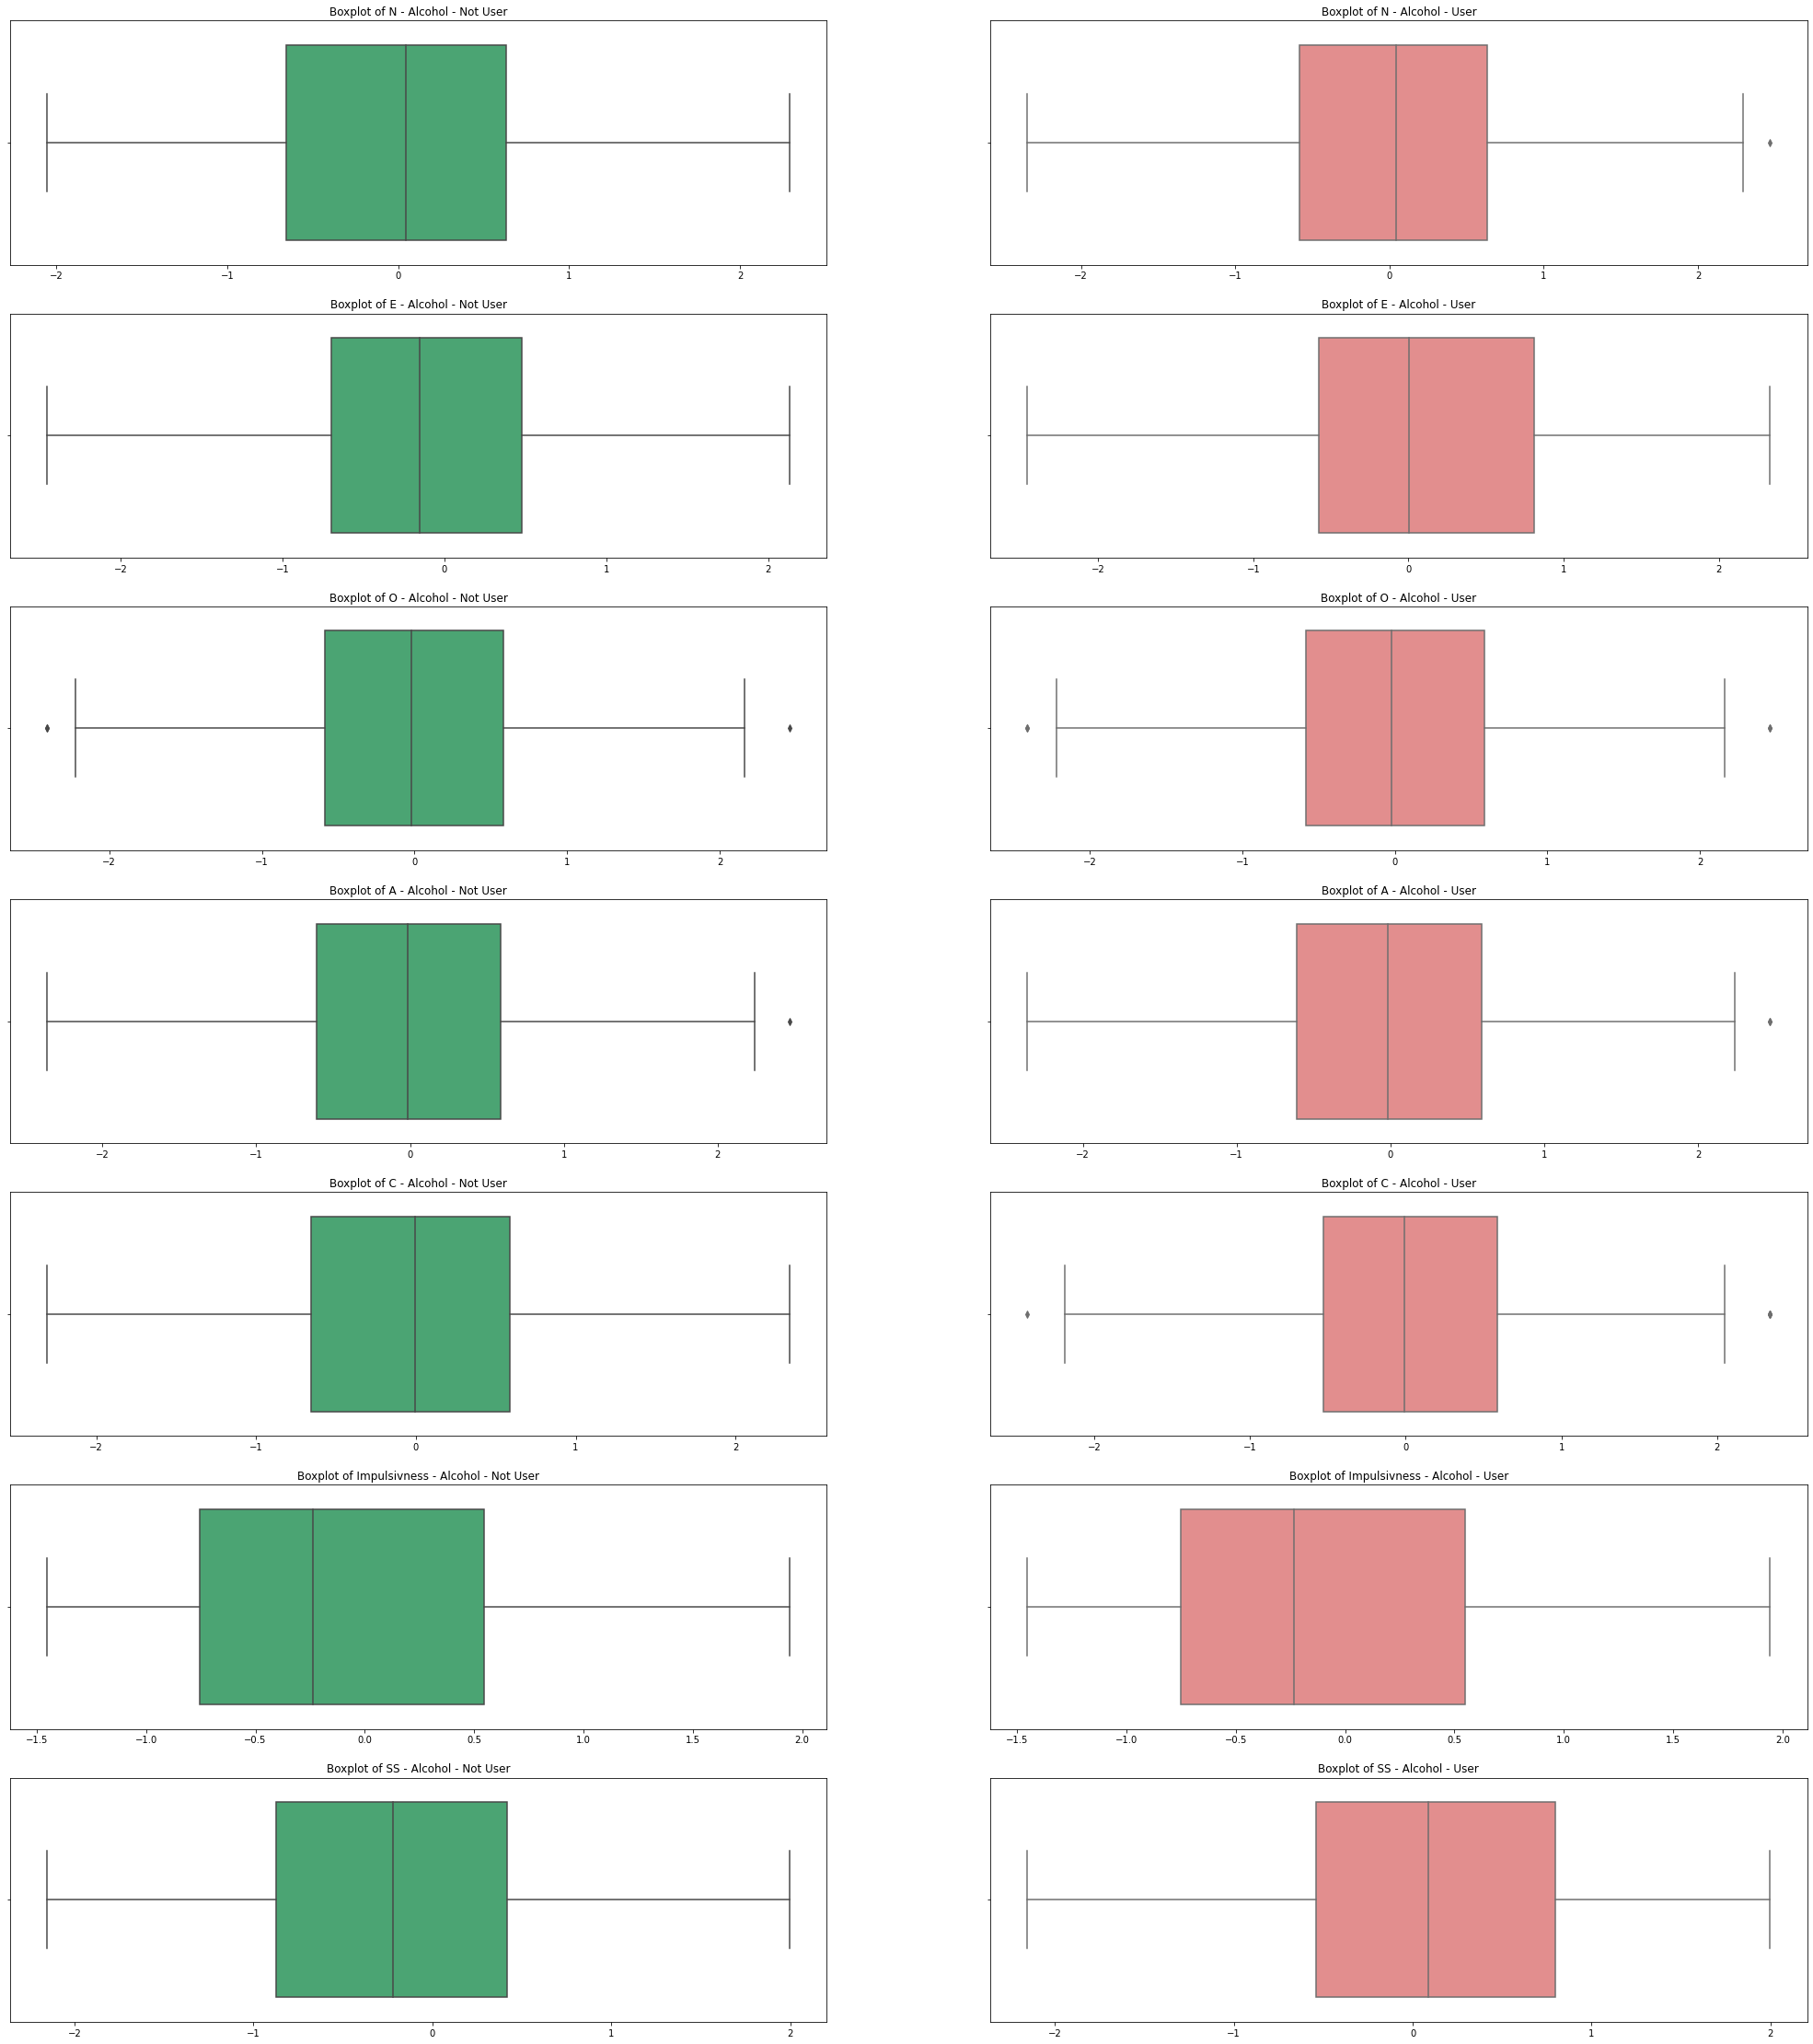

In [48]:
fig, axs = plt.subplots(ncols=2,nrows=7,figsize=(35,40))
box_plot(df_iso,'N',0,0,'Alcohol')
box_plot(df_iso,'E',1,0,'Alcohol')
box_plot(df_iso,'O',2,0,'Alcohol')
box_plot(df_iso,'A',3,0,'Alcohol')
box_plot(df_iso,'C',4,0,'Alcohol')
box_plot(df_iso,'Impulsivness',5,0,'Alcohol')
box_plot(df_iso,'SS',6,0,'Alcohol')
plt.savefig('Boxplots_ISO_After_Alcohol.png', dpi=300, bbox_inches='tight')

In [49]:
alcohol=y_iso['Alcohol']
cannabis=y_iso['Cannabis']
nicotine=y_iso['Nicotine']

X_train_alc,X_test_alc,y_train_alc,y_test_alc=train_test_split(X_iso, alcohol, test_size=0.20, random_state=42,stratify=alcohol) 
X_train_cann,X_test_cann,y_train_cann,y_test_cann=train_test_split(X_iso, cannabis, test_size=0.20, random_state=42,stratify=cannabis) 
X_train_nic,X_test_nic,y_train_nic,y_test_nic=train_test_split(X_iso, nicotine, test_size=0.20, random_state=42,stratify=nicotine)



In [50]:
#########models
#apply smote
#apply cross validation k-folds k = 5

kf=StratifiedKFold(n_splits=10)
sm = SMOTE(random_state=42)
rus = RandomUnderSampler(replacement=True)

In [71]:
#decision tree
def train_test_models(model,new_model,X_tot,y_tot,X_test, y_test,kf,sm,drug,rf=False):
    f1_scores=[]
    acc=[]
    
    #split in train and val
    for train_index, val_index in kf.split(X_tot,y_tot):
        X_train, x_val = X_tot.iloc[train_index], X_tot.iloc[val_index]
        y_train, y_val = y_tot.iloc[train_index], y_tot.iloc[val_index]
        
        X_smoote, y_smoote = sm.fit_resample(X_train,y_train)
        model.fit(X_smoote,y_smoote)
        prediction = model.predict(x_val)
        f1_scores.append(f1_score(prediction, y_val,average='macro'))
        acc.append(accuracy_score(prediction, y_val))
    
    f1_mean=np.mean(f1_scores)
    accuracy_mean= np.mean(acc)
    
    X_smoote2, y_smoote2 = sm.fit_resample(X_tot,y_tot)
    new_model.fit(X_smoote2,y_smoote2)
    if rf == True:
        feats ={}
        for feature, importance in zip(X.columns, new_model.feature_importances_):
            feats[feature] = importance

        importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
        importances = importances.sort_values(by='Gini-Importance', ascending=False)
        importances = importances.reset_index()
        importances = importances.rename(columns={'index': 'Features'})
        sns.set(font_scale = 5)
        sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
        fig, ax = plt.subplots()
        fig.set_size_inches(20,15)
        sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
        plt.xlabel('Importance', fontsize=25, weight = 'bold')
        plt.ylabel('Features', fontsize=25, weight = 'bold')
        plt.title(f'Feature Importance {drug}', fontsize=25, weight = 'bold')
        plt.savefig(f'FeatureImportance_{drug}.png', dpi=300, bbox_inches='tight')
        
    test_prediction = new_model.predict(X_test)
    accuracy_test = (accuracy_score(test_prediction, y_test))
    test_prediction = new_model.predict(X_test)
    
    accuracy_test = (accuracy_score(test_prediction, y_test))
    f1_score_test = (f1_score(test_prediction, y_test,average='macro'))
    
    precision_test = (precision_score(test_prediction, y_test,average='macro'))
    recall_test = (recall_score(test_prediction, y_test,average='macro'))
    
    
    print(f'********************************* {type(model).__name__} - {drug} scores ****************************************')
    print(f'VALIDATION: F1-score = {f1_mean}, Accuracy = {accuracy_mean},')
    print()
    print(f'TEST:      F1-score = {f1_score_test}, Accuracy = {accuracy_test},')
    print(f'           Precision = {precision_test}, Recall= {recall_test}')
    print()
    return test_prediction,f1_score_test, accuracy_test

In [52]:
def train_test_models_UNDER(model,new_model,X_tot,y_tot,X_test, y_test,kf,rus,drug,rf=False):
    f1_scores=[]
    acc=[]
    
    for train_index, val_index in kf.split(X_tot,y_tot):
        X_train, x_val = X_tot.iloc[train_index], X_tot.iloc[val_index]
        y_train, y_val = y_tot.iloc[train_index], y_tot.iloc[val_index]
        
        X_rus, y_rus = rus.fit_resample(X_train,y_train)
        model.fit(X_rus,y_rus)
        prediction = model.predict(x_val)
        f1_scores.append(f1_score(prediction, y_val,average='macro'))
        acc.append(accuracy_score(prediction, y_val))
    
    f1_mean=np.mean(f1_scores)
    accuracy_mean= np.mean(acc)
    
    X_rus2, y_rus2 = rus.fit_resample(X_tot,y_tot)
    new_model.fit(X_rus2,y_rus2)
    if rf == True:
        feats ={}
        for feature, importance in zip(X.columns, new_model.feature_importances_):
            feats[feature] = importance

        importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
        importances = importances.sort_values(by='Gini-Importance', ascending=False)
        importances = importances.reset_index()
        importances = importances.rename(columns={'index': 'Features'})
        sns.set(font_scale = 5)
        sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
        fig, ax = plt.subplots()
        fig.set_size_inches(20,15)
        sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
        plt.xlabel('Importance', fontsize=25, weight = 'bold')
        plt.ylabel('Features', fontsize=25, weight = 'bold')
        plt.title(f'Feature Importance {drug}', fontsize=25, weight = 'bold')
        plt.savefig(f'FeatureImportance_{drug}.png', dpi=300, bbox_inches='tight')
        
    test_prediction = new_model.predict(X_test)
    accuracy_test = (accuracy_score(test_prediction, y_test))
    test_prediction = new_model.predict(X_test)
    
    accuracy_test = (accuracy_score(test_prediction, y_test))
    f1_score_test = (f1_score(test_prediction, y_test,average='macro'))
    
    precision_test = (precision_score(test_prediction, y_test,average='macro'))
    recall_test = (recall_score(test_prediction, y_test,average='macro'))
    
    
    print(f'********************************* {type(model).__name__} - {drug} scores ****************************************')
    print(f'VALIDATION: F1-score = {f1_mean}, Accuracy = {accuracy_mean},')
    print()
    print(f'TEST:      F1-score = {f1_score_test}, Accuracy = {accuracy_test},')
    print(f'           Precision = {precision_test}, Recall= {recall_test}')
    print()
    return test_prediction, f1_score_test, accuracy_test

## OverSampling

In [53]:
#######Decision Tree
DecisionTree_1=DecisionTreeClassifier(criterion = 'entropy',max_features='auto', splitter='best')
DecisionTree_1_new=DecisionTreeClassifier(criterion = 'entropy',max_features='auto', splitter='best')
DecisionTree_2=DecisionTreeClassifier(criterion = 'entropy',max_features='sqrt', splitter='random')
DecisionTree_2_new=DecisionTreeClassifier(criterion = 'entropy',max_features='sqrt', splitter='random')
DecisionTree_3=DecisionTreeClassifier(criterion = 'entropy',max_features='sqrt', splitter='best')
DecisionTree_3_new=DecisionTreeClassifier(criterion = 'entropy',max_features='sqrt', splitter='best')

#parameters = {'criterion':('gini', 'entropy'), 'splitter':('best', 'random'),'max_features':('auto', 'sqrt')}
#DT_GS = GridSearchCV(DecisionTree, parameters,scoring=['f1_macro','accuracy'],refit='f1_macro',cv=10)


test_pred_DT_alc, f1_score_test_DT_alc, accuracy_test_DT_alc = train_test_models(DecisionTree_1,DecisionTree_1_new,X_train_alc,y_train_alc,X_test_alc,y_test_alc,kf,sm,'Alcohol')
#print(DT_GS.best_params_)
test_pred_DT_cann, f1_score_test_DT_cann, accuracy_test_DT_cann = train_test_models(DecisionTree_2,DecisionTree_2_new,X_train_cann,y_train_cann,X_test_cann,y_test_cann,kf,sm,'Cannabis')
#print(DT_GS.best_params_)
test_pred_DT_nic, f1_score_test_DT_nic, accuracy_test_DT_nic = train_test_models(DecisionTree_3,DecisionTree_3_new,X_train_nic,y_train_nic,X_test_nic,y_test_nic,kf,sm,'Nicotine')
#print(DT_GS.best_params_)

********************************* DecisionTreeClassifier - Alcohol scores ****************************************
VALIDATION: F1-score = 0.5063570998880552, Accuracy = 0.5454920951431419,

TEST:      F1-score = 0.545060954768144, Accuracy = 0.5925925925925926,
           Precision = 0.5466417910447762, Recall= 0.5446428571428572

********************************* DecisionTreeClassifier - Cannabis scores ****************************************
VALIDATION: F1-score = 0.6443328913565881, Accuracy = 0.6685657313772967,

TEST:      F1-score = 0.6243902439024389, Accuracy = 0.6464646464646465,
           Precision = 0.626984126984127, Recall= 0.6230769230769231

********************************* DecisionTreeClassifier - Nicotine scores ****************************************
VALIDATION: F1-score = 0.5635173411340804, Accuracy = 0.5766699900299103,

TEST:      F1-score = 0.5356811209196808, Accuracy = 0.5521885521885522,
           Precision = 0.5356404958677686, Recall= 0.5357344632768362

In [54]:
#make a confusion matrix for each drug and model that performs better
def conf_matrix(y_test, test_pred,drug):
    cf_matrix = confusion_matrix(y_test, test_pred)
    ax = sns.heatmap(cf_matrix, annot=True,  fmt='g',cmap='Blues',xticklabels=["Not User","User"],yticklabels=['Not User','User'])
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    ax.set(xlabel='Predicted Label', ylabel='True Label')
    plt.savefig(f'ConfMatrix_{drug}.png', dpi=300, bbox_inches='tight')


********************************* RandomForestClassifier - Alcohol scores ****************************************
VALIDATION: F1-score = 0.5466419803422948, Accuracy = 0.6442529554194558,

TEST:      F1-score = 0.5225648964039057, Accuracy = 0.6363636363636364,
           Precision = 0.5300062189054726, Recall= 0.5429016004742145

********************************* RandomForestClassifier - Cannabis scores ****************************************
VALIDATION: F1-score = 0.7338226773139911, Accuracy = 0.7554336989032902,

TEST:      F1-score = 0.7212782771905561, Accuracy = 0.7441077441077442,
           Precision = 0.7195767195767195, Recall= 0.7232961339178956

********************************* RandomForestClassifier - Nicotine scores ****************************************
VALIDATION: F1-score = 0.6128269354839231, Accuracy = 0.6323244552058112,

TEST:      F1-score = 0.52590548550357, Accuracy = 0.5656565656565656,
           Precision = 0.5302169421487604, Recall= 0.5345410628019324

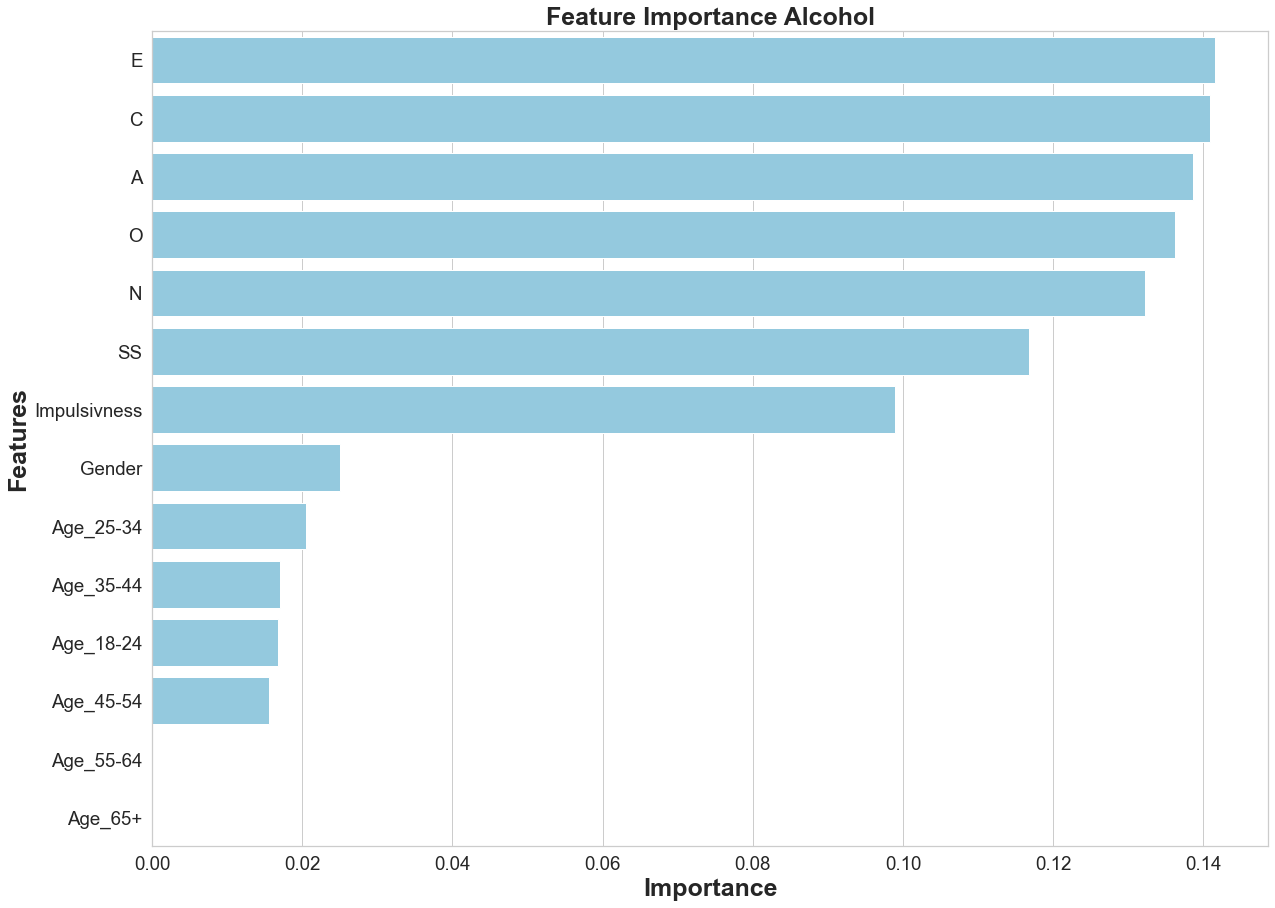

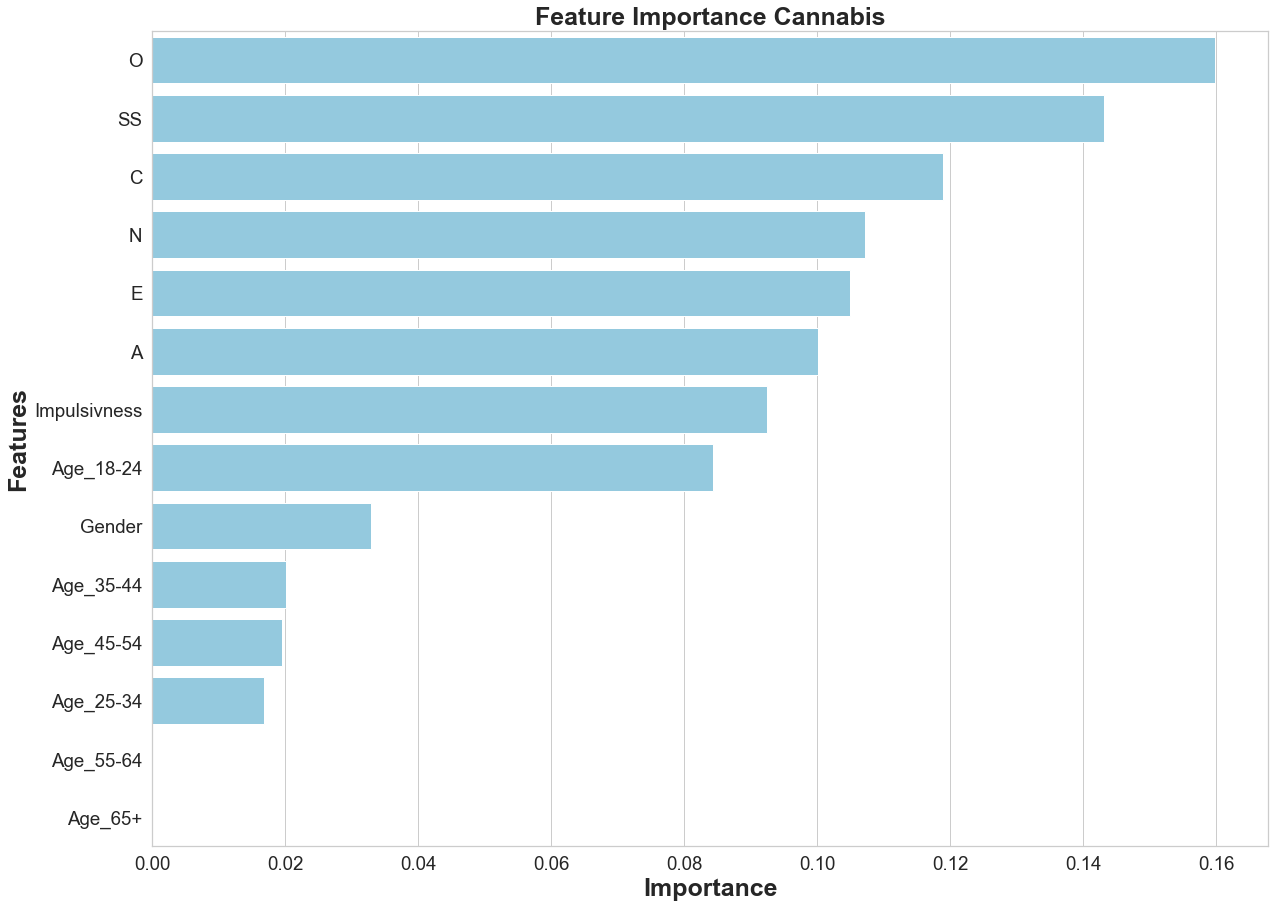

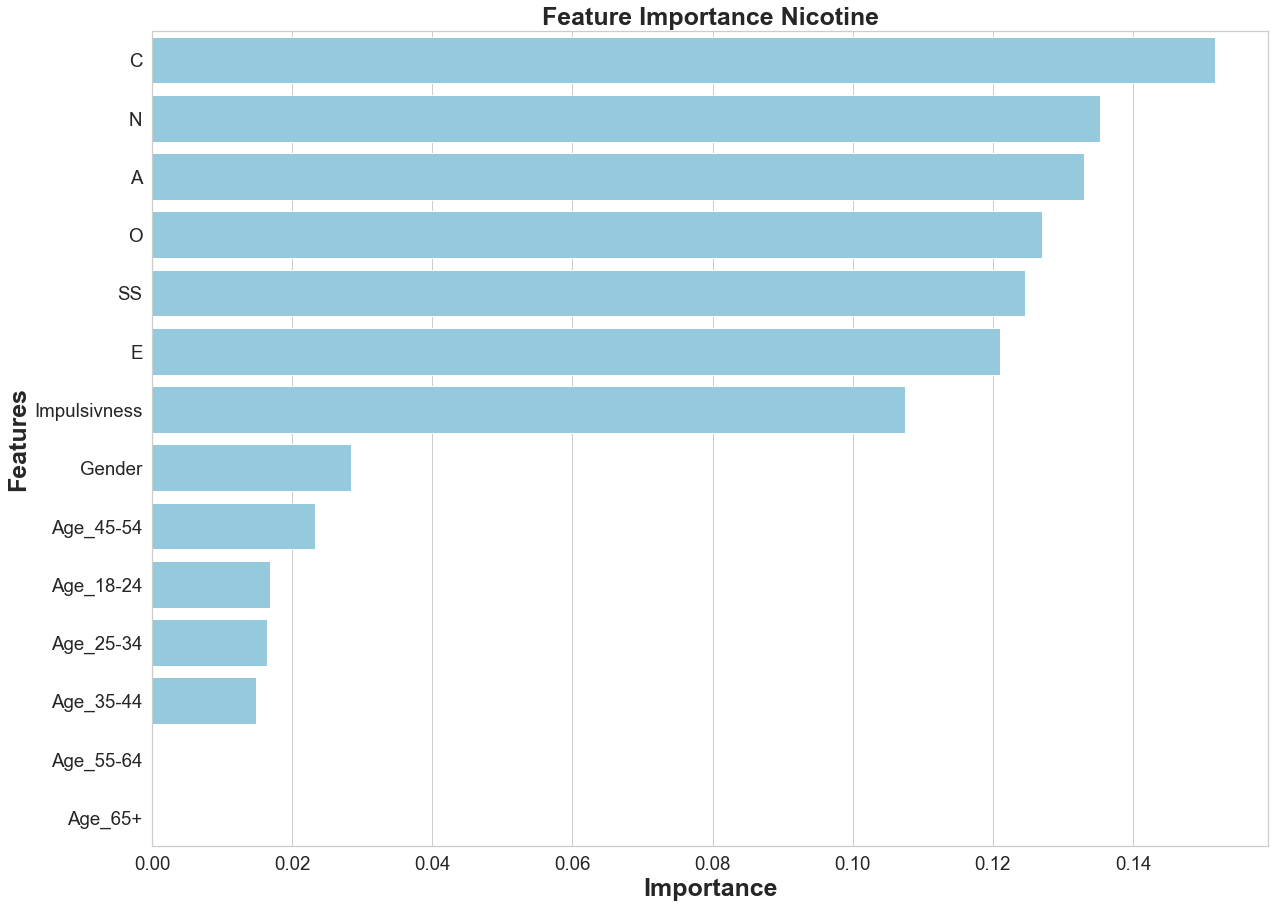

In [72]:
#Random forest
RandomForest_1 = RandomForestClassifier(n_estimators=200,criterion='gini', max_features='sqrt')
RandomForest_1_new = RandomForestClassifier(n_estimators=200,criterion='gini', max_features='sqrt')
RandomForest_2 = RandomForestClassifier(n_estimators=100,criterion='gini', max_features='auto')
RandomForest_2_new = RandomForestClassifier(n_estimators=100,criterion='gini', max_features='auto')
RandomForest_3 = RandomForestClassifier(n_estimators=50,criterion='gini', max_features='sqrt')
RandomForest_3_new = RandomForestClassifier(n_estimators=50,criterion='gini', max_features='sqrt')

#parameters = {'n_estimators':[10,50,100,200], 'criterion':('gini', 'entropy'),'max_features':('auto', 'sqrt')}
#RF_GS = GridSearchCV(RandomForest, parameters,scoring=['f1_macro','accuracy'],refit='f1_macro',cv=10)


test_pred_RF_alc,f1_score_test_RF_alc, accuracy_test_RF_alc = train_test_models(RandomForest_1,RandomForest_1_new,X_train_alc,y_train_alc,X_test_alc,y_test_alc,kf,sm,'Alcohol',rf=True)
#print(RF_GS.best_params_)
test_pred_RF_cann,f1_score_test_RF_cann, accuracy_test_RF_cann = train_test_models(RandomForest_2,RandomForest_2_new,X_train_cann,y_train_cann,X_test_cann,y_test_cann,kf,sm,'Cannabis',rf=True)
#print(RF_GS.best_params_)
test_pred_RF_nic,f1_score_test_RF_nic, accuracy_test_RF_nic = train_test_models(RandomForest_3,RandomForest_3_new,X_train_nic,y_train_nic,X_test_nic,y_test_nic,kf,sm,'Nicotine',rf=True)
#print(RF_GS.best_params_)

In [56]:
#SVM
SVM_1 = svm.SVC(C=2.0,gamma='scale',kernel='rbf')
SVM_1_new =svm.SVC(C=2.0,gamma='scale',kernel='rbf')
SVM_3 = svm.SVC(C=1.5,gamma='scale',kernel='rbf')
SVM_3_new =svm.SVC(C=1.5,gamma='scale',kernel='rbf')

#parameters = {'C':[1.0,1.5,2.0], 'kernel':('linear', 'poly', 'rbf', 'sigmoid'),'gamma':('auto', 'scale')}
#SVM_GS = GridSearchCV(SVM, parameters,scoring=['f1_macro','accuracy'],refit='f1_macro',cv=10)

test_pred_SVM_alc,f1_score_test_SVM_alc, accuracy_test_SVM_alc = train_test_models(SVM_1,SVM_1_new,X_train_alc,y_train_alc,X_test_alc,y_test_alc,kf,sm,'Alcohol',rf=False)
#print(SVM_GS.best_params_)
test_pred_SVM_cann,f1_score_test_SVM_cann, accuracy_test_SVM_cann = train_test_models(SVM_1,SVM_1_new,X_train_cann,y_train_cann,X_test_cann,y_test_cann,kf,sm,'Cannabis',rf=False)
#print(SVM_GS.best_params_)
test_pred_SVM_nic,f1_score_test_SVM_nic, accuracy_test_SVM_nic = train_test_models(SVM_3,SVM_3_new,X_train_nic,y_train_nic,X_test_nic,y_test_nic,kf,sm,'Nicotine',rf=False)
#print(SVM_GS.best_params_)

********************************* SVC - Alcohol scores ****************************************
VALIDATION: F1-score = 0.5808952628733384, Accuracy = 0.6265346816692778,

TEST:      F1-score = 0.5318036232609349, Accuracy = 0.5757575757575758,
           Precision = 0.5342039800995025, Recall= 0.5320855614973262

********************************* SVC - Cannabis scores ****************************************
VALIDATION: F1-score = 0.7151338342959879, Accuracy = 0.730159521435693,

TEST:      F1-score = 0.7139918918597601, Accuracy = 0.7272727272727273,
           Precision = 0.7222222222222222, Recall= 0.7109767441860465

********************************* SVC - Nicotine scores ****************************************
VALIDATION: F1-score = 0.6023011967344027, Accuracy = 0.6096140150975644,

TEST:      F1-score = 0.593358395989975, Accuracy = 0.6026936026936027,
           Precision = 0.5950413223140496, Recall= 0.5930745884300561



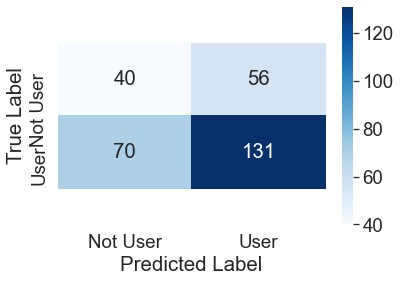

In [57]:
conf_matrix(y_test_alc, test_pred_SVM_alc,'Alcohol')

In [58]:
#k-Nearest neighbor
KNearestNeighbors = KNeighborsClassifier(n_neighbors=5,weights='distance')
KNearestNeighbors_new = KNeighborsClassifier(n_neighbors=5,weights='distance')

#parameters = {'n_neighbors':[5,10,20], 'weights':('uniform', 'distance')}
#kNN_GS = GridSearchCV(KNearestNeighbors, parameters,scoring=['f1_macro','accuracy'],refit='f1_macro',cv=10)

test_pred_kNN_alc,f1_score_test_kNN_alc, accuracy_test_kNN_alc = train_test_models(KNearestNeighbors,KNearestNeighbors_new,X_train_alc,y_train_alc,X_test_alc,y_test_alc,kf,sm,'Alcohol')
#print(kNN_GS.best_params_)
test_pred_kNN_cann,f1_score_test_kNN_cann, accuracy_test_kNN_cann = train_test_models(KNearestNeighbors,KNearestNeighbors_new,X_train_cann,y_train_cann,X_test_cann,y_test_cann,kf,sm,'Cannabis')
#print(kNN_GS.best_params_)
test_pred_kNN_nic,f1_score_test_kNN_nic, accuracy_test_kNN_nic = train_test_models(KNearestNeighbors,KNearestNeighbors_new,X_train_nic,y_train_nic,X_test_nic,y_test_nic,kf,sm,'Nicotine')
#print(kNN_GS.best_params_)

********************************* KNeighborsClassifier - Alcohol scores ****************************************
VALIDATION: F1-score = 0.5430676111299128, Accuracy = 0.560675117504629,

TEST:      F1-score = 0.49350649350649356, Accuracy = 0.5185185185185185,
           Precision = 0.5027985074626865, Recall= 0.5024691358024691

********************************* KNeighborsClassifier - Cannabis scores ****************************************
VALIDATION: F1-score = 0.6792809879151969, Accuracy = 0.6913829938755163,

TEST:      F1-score = 0.683913221449038, Accuracy = 0.6936026936026936,
           Precision = 0.6977513227513228, Recall= 0.684146897810219

********************************* KNeighborsClassifier - Nicotine scores ****************************************
VALIDATION: F1-score = 0.5852383884732082, Accuracy = 0.5902791625124626,

TEST:      F1-score = 0.5721200945081542, Accuracy = 0.5791245791245792,
           Precision = 0.575154958677686, Recall= 0.5729423024336888



In [59]:
#Logistic Regression
logreg = LogisticRegression(C=1.0, fit_intercept=True, max_iter=100)
logreg_new = LogisticRegression(C=1.0, fit_intercept=True, max_iter=100)
logreg_2 = LogisticRegression(C=2.0, fit_intercept=True, max_iter=100)
logreg_2_new = LogisticRegression(C=2.0, fit_intercept=True, max_iter=100)

logreg_3 = LogisticRegression(C=1.5, fit_intercept=False, max_iter=100)
logreg_3_new = LogisticRegression(C=1.5, fit_intercept=False, max_iter=100)

#parameters = {'C':[1.0,1.5,2.0],'fit_intercept':[True, False],'max_iter':[100,1000]}
#logreg_GS = GridSearchCV(logreg, parameters,scoring=['f1_macro','accuracy'],refit='f1_macro',cv=10)

test_pred_logreg_alc,f1_score_test_logreg_alc, accuracy_test_logreg_alc = train_test_models(logreg,logreg_new,X_train_alc,y_train_alc,X_test_alc,y_test_alc,kf,sm,'Alcohol')
#print(logreg_GS.best_params_)
test_pred_logreg_cann,f1_score_test_logreg_cann, accuracy_test_logreg_cann = train_test_models(logreg_2,logreg_2_new,X_train_cann,y_train_cann,X_test_cann,y_test_cann,kf,sm,'Cannabis')
#print(logreg_GS.best_params_)
test_pred_logreg_nic,f1_score_test_logreg_nic, accuracy_test_logreg_nic = train_test_models(logreg_3,logreg_3_new,X_train_nic,y_train_nic,X_test_nic,y_test_nic,kf,sm,'Nicotine')
#print(logreg_GS.best_params_)

********************************* LogisticRegression - Alcohol scores ****************************************
VALIDATION: F1-score = 0.5303305441503232, Accuracy = 0.5691781797464748,

TEST:      F1-score = 0.5986888199379441, Accuracy = 0.6363636363636364,
           Precision = 0.603467039800995, Recall= 0.5970588235294118

********************************* LogisticRegression - Cannabis scores ****************************************
VALIDATION: F1-score = 0.7252776778528002, Accuracy = 0.7386269762142146,

TEST:      F1-score = 0.7338709677419355, Accuracy = 0.7508417508417509,
           Precision = 0.7367724867724867, Recall= 0.731665228645384

********************************* LogisticRegression - Nicotine scores ****************************************
VALIDATION: F1-score = 0.621479825269554, Accuracy = 0.6290343255946447,

TEST:      F1-score = 0.5987830364049924, Accuracy = 0.6060606060606061,
           Precision = 0.6017561983471074, Recall= 0.5989678480087687



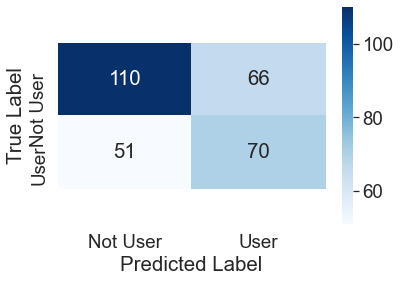

In [60]:
conf_matrix(y_test_nic, test_pred_logreg_nic,'Nicotine')

## UnderSampling

In [61]:
#######Decision Tree
DecisionTree_1=DecisionTreeClassifier(criterion= 'entropy', max_features= 'auto', splitter= 'random')
DecisionTree_1_new=DecisionTreeClassifier(criterion= 'entropy', max_features= 'auto', splitter= 'random')
DecisionTree_2=DecisionTreeClassifier(criterion= 'gini', max_features= 'auto', splitter= 'random')
DecisionTree_2_new=DecisionTreeClassifier(criterion= 'gini', max_features= 'auto', splitter= 'random')
DecisionTree_3=DecisionTreeClassifier(criterion= 'gini', max_features= 'sqrt', splitter= 'best')
DecisionTree_3_new=DecisionTreeClassifier(criterion= 'gini', max_features= 'sqrt', splitter= 'best')

#parameters = {'criterion':('gini', 'entropy'), 'splitter':('best', 'random'),'max_features':('auto', 'sqrt')}
#DT_GS = GridSearchCV(DecisionTree, parameters,scoring=['f1_macro','accuracy'],refit='f1_macro',cv=10)

test_pred_DT_U_alc,f1_score_test_DT_U_alc, accuracy_test_DT_U_alc = train_test_models_UNDER(DecisionTree_1,DecisionTree_1_new,X_train_alc,y_train_alc,X_test_alc,y_test_alc,kf,rus,'Alcohol')
#print(DT_GS.best_params_)
test_pred_DT_U_cann,f1_score_test_DT_U_cann, accuracy_test_DT_U_cann = train_test_models_UNDER(DecisionTree_2,DecisionTree_2_new,X_train_cann,y_train_cann,X_test_cann,y_test_cann,kf,rus,'Cannabis')
#print(DT_GS.best_params_)
test_pred_DT_U_nic,f1_score_test_DT_U_nic, accuracy_test_DT_U_nic = train_test_models_UNDER(DecisionTree_3,DecisionTree_3_new,X_train_nic,y_train_nic,X_test_nic,y_test_nic,kf,rus,'Nicotine')
#print(DT_GS.best_params_)

********************************* DecisionTreeClassifier - Alcohol scores ****************************************
VALIDATION: F1-score = 0.49093936346064615, Accuracy = 0.5017305227175616,

TEST:      F1-score = 0.4733072316904652, Accuracy = 0.48148148148148145,
           Precision = 0.4999222636815921, Recall= 0.49993123051531263

********************************* DecisionTreeClassifier - Cannabis scores ****************************************
VALIDATION: F1-score = 0.6169144438251816, Accuracy = 0.6239495798319328,

TEST:      F1-score = 0.6008293798031084, Accuracy = 0.6060606060606061,
           Precision = 0.621031746031746, Recall= 0.6122444343480236

********************************* DecisionTreeClassifier - Nicotine scores ****************************************
VALIDATION: F1-score = 0.5473354546474332, Accuracy = 0.5489032901296111,

TEST:      F1-score = 0.5184736938253562, Accuracy = 0.5218855218855218,
           Precision = 0.5242768595041323, Recall= 0.523450966161

********************************* RandomForestClassifier - Alcohol scores ****************************************
VALIDATION: F1-score = 0.47367753147871355, Accuracy = 0.47558040165218624,

TEST:      F1-score = 0.48824073123138545, Accuracy = 0.49158249158249157,
           Precision = 0.5291511194029851, Recall= 0.5264830508474576

********************************* RandomForestClassifier - Cannabis scores ****************************************
VALIDATION: F1-score = 0.704652818297699, Accuracy = 0.7115795470730666,

TEST:      F1-score = 0.6967418546365916, Accuracy = 0.7037037037037037,
           Precision = 0.7156084656084656, Recall= 0.6997549019607843

********************************* RandomForestClassifier - Nicotine scores ****************************************
VALIDATION: F1-score = 0.6000589719823719, Accuracy = 0.6011750462897022,

TEST:      F1-score = 0.5316467184752396, Accuracy = 0.531986531986532,
           Precision = 0.5457128099173554, Recall= 0.544919712070

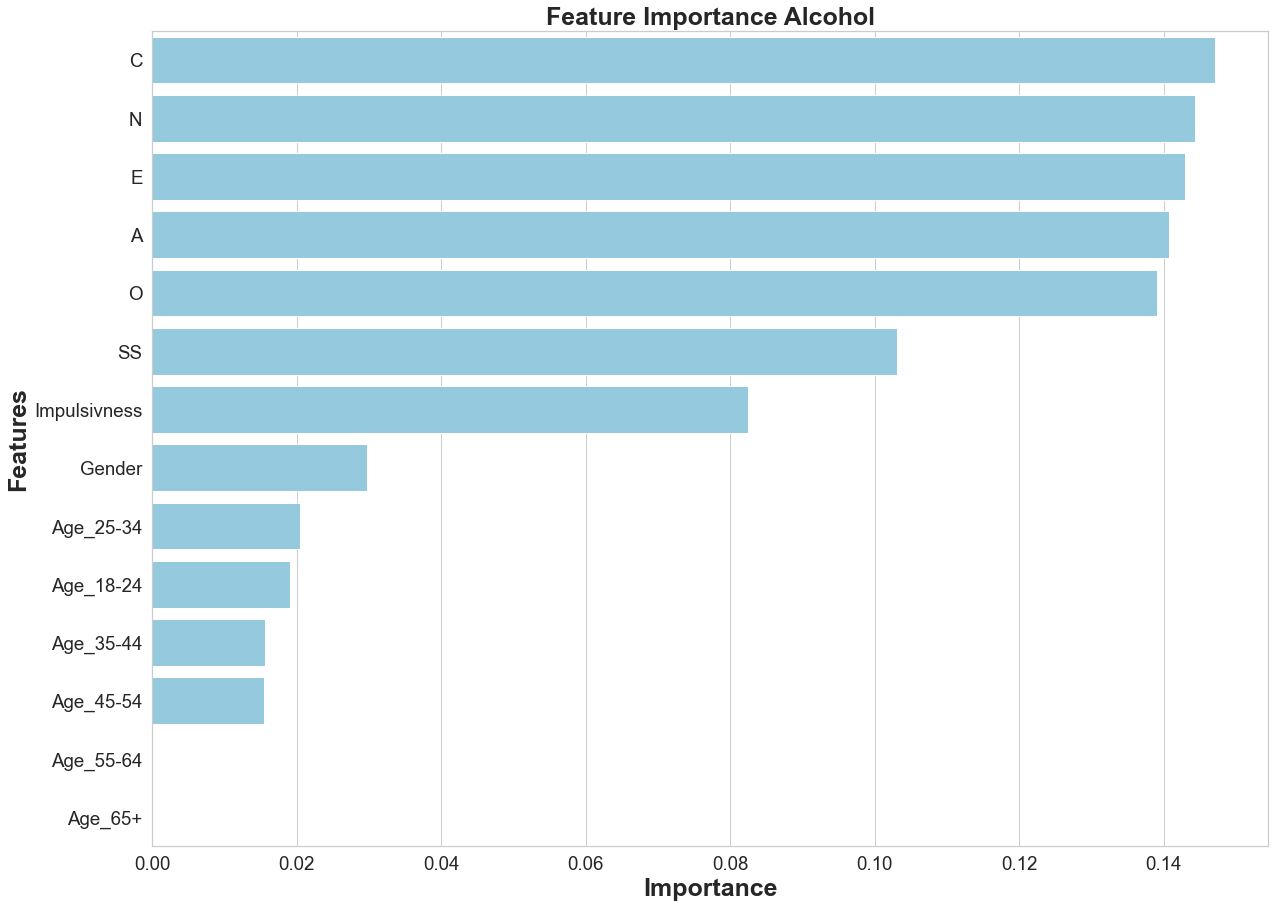

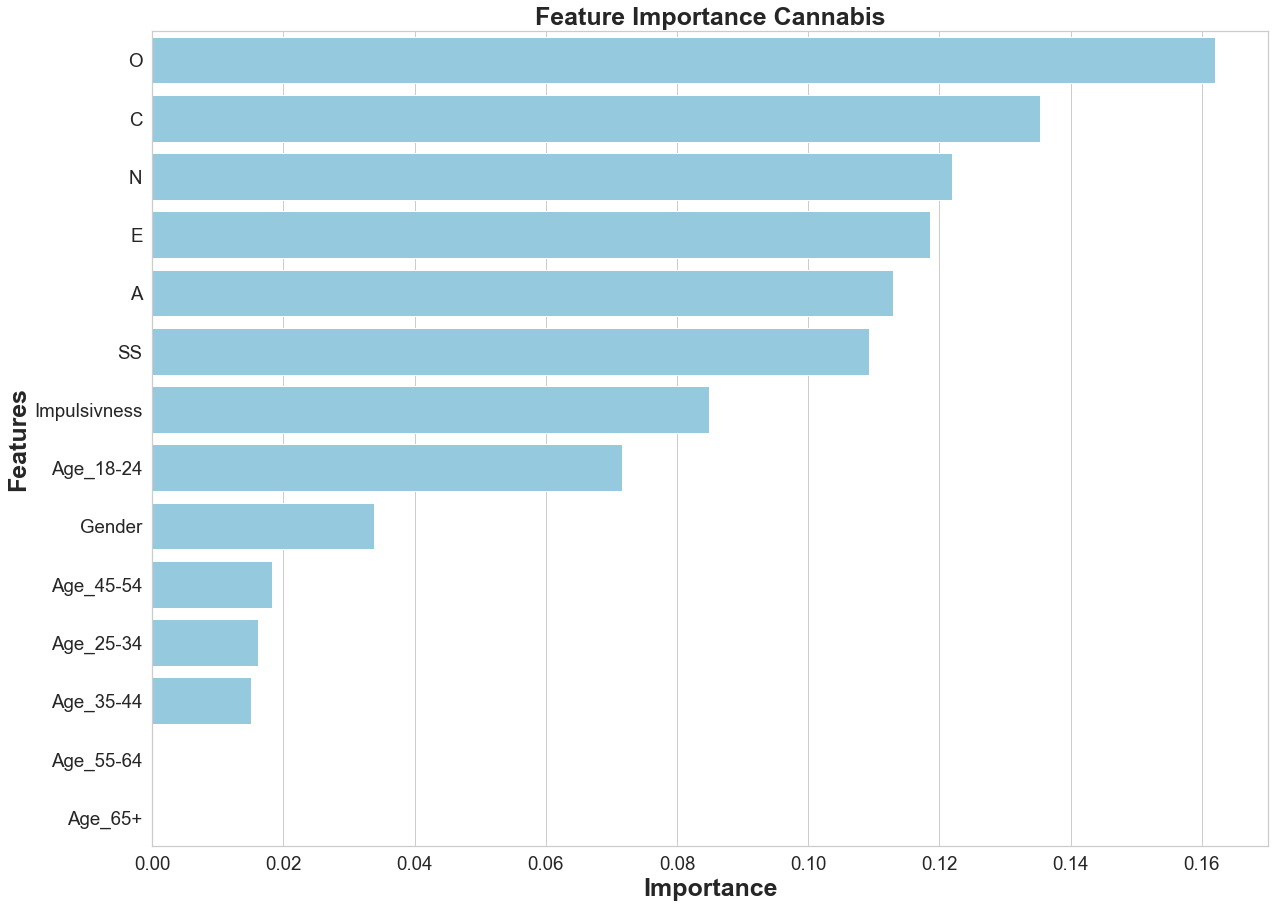

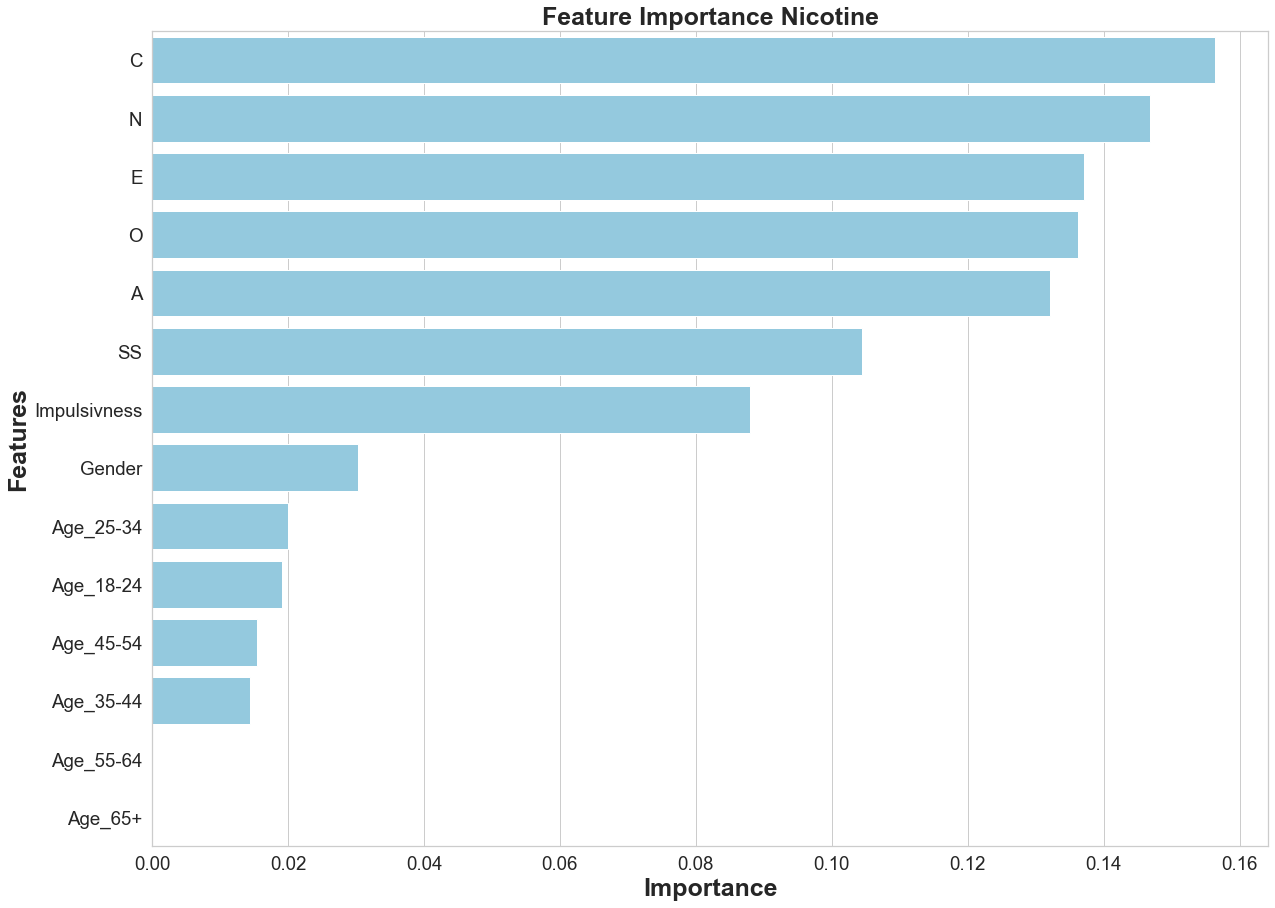

In [62]:
RandomForest = RandomForestClassifier(criterion='entropy', max_features='auto', n_estimators=10)
RandomForest_new = RandomForestClassifier(criterion='entropy', max_features='auto', n_estimators=100)
RandomForest_2 = RandomForestClassifier(criterion='entropy', max_features='auto', n_estimators=100)
RandomForest_2_new = RandomForestClassifier(criterion='entropy', max_features='auto', n_estimators=100)
RandomForest_3 = RandomForestClassifier(criterion='entropy', max_features='auto', n_estimators=50)
RandomForest_3_new = RandomForestClassifier(criterion='entropy', max_features='auto', n_estimators=50)

#parameters = {'n_estimators':[10,50,100,200], 'criterion':('gini', 'entropy'),'max_features':('auto', 'sqrt')}
#RF_GS = GridSearchCV(RandomForest, parameters,scoring=['f1_macro','accuracy'],refit='f1_macro',cv=10)


test_pred_RF_U_alc,f1_score_test_RF_U_alc, accuracy_test_RF_U_alc = train_test_models_UNDER(RandomForest,RandomForest_new,X_train_alc,y_train_alc,X_test_alc,y_test_alc,kf,rus,'Alcohol',rf=True)
#print(RF_GS.best_params_)
test_pred_RF_U_cann,f1_score_test_RF_U_cann, accuracy_test_RF_U_cann = train_test_models_UNDER(RandomForest_2,RandomForest_2_new,X_train_cann,y_train_cann,X_test_cann,y_test_cann,kf,rus,'Cannabis',rf=True)
#print(RF_GS.best_params_)
test_pred_RF_U_nic,f1_score_test_RF_U_nic, accuracy_test_RF_U_nic = train_test_models_UNDER(RandomForest_3,RandomForest_2_new,X_train_nic,y_train_nic,X_test_nic,y_test_nic,kf,rus,'Nicotine',rf=True)
#print(RF_GS.best_params_)

In [63]:
#SVM
SVM = svm.SVC(C=2.0,gamma='scale',kernel='rbf')
SVM_new =svm.SVC(C=2.0,gamma='scale',kernel='rbf')
SVM_2 = svm.SVC(C=1.5,gamma='auto',kernel='linear')
SVM_2_new =svm.SVC(C=1.5,gamma='auto',kernel='linear')


#parameters = {'C':[1.0,1.5,2.0], 'kernel':('linear', 'poly', 'rbf', 'sigmoid'),'gamma':('auto', 'scale')}
#SVM_GS = GridSearchCV(SVM, parameters,scoring=['f1_macro','accuracy'],refit='f1_macro',cv=10)

test_pred_SVM_U_alc,f1_score_test_SVM_U_alc, accuracy_test_SVM_U_alc = train_test_models_UNDER(SVM,SVM_new,X_train_alc,y_train_alc,X_test_alc,y_test_alc,kf,rus,'Alcohol')
#print(SVM_GS.best_params_)
test_pred_SVM_U_cann,f1_score_test_SVM_U_cann, accuracy_test_SVM_U_cann = train_test_models_UNDER(SVM_2,SVM_2_new,X_train_cann,y_train_cann,X_test_cann,y_test_cann,kf,rus,'Cannabis')
#print(SVM_GS.best_params_)
test_pred_SVM_U_nic,f1_score_test_SVM_U_nic, accuracy_test_SVM_U_nic = train_test_models_UNDER(SVM,SVM_new,X_train_nic,y_train_nic,X_test_nic,y_test_nic,kf,rus,'Nicotine')
#print(SVM_GS.best_params_)

********************************* SVC - Alcohol scores ****************************************
VALIDATION: F1-score = 0.5250083898847528, Accuracy = 0.5388477424868252,

TEST:      F1-score = 0.5302851477669719, Accuracy = 0.5488215488215489,
           Precision = 0.5469527363184079, Recall= 0.5411631076783281

********************************* SVC - Cannabis scores ****************************************
VALIDATION: F1-score = 0.7180220816693847, Accuracy = 0.7300598205383848,

TEST:      F1-score = 0.7102439024390244, Accuracy = 0.7272727272727273,
           Precision = 0.7142857142857142, Recall= 0.7076923076923077

********************************* SVC - Nicotine scores ****************************************
VALIDATION: F1-score = 0.5968814699488785, Accuracy = 0.5994872525281298,

TEST:      F1-score = 0.5933519726623173, Accuracy = 0.5993265993265994,
           Precision = 0.5973657024793388, Recall= 0.5943357597816197



In [64]:
KNearestNeighbors = KNeighborsClassifier(n_neighbors=10,weights='distance')
KNearestNeighbors_new = KNeighborsClassifier(n_neighbors=10,weights='distance')
KNearestNeighbors_2 = KNeighborsClassifier(n_neighbors=20,weights='distance')
KNearestNeighbors_2_new = KNeighborsClassifier(n_neighbors=20,weights='distance')

#parameters = {'n_neighbors':[5,10,20], 'weights':('uniform', 'distance')}
#kNN_GS = GridSearchCV(KNearestNeighbors, parameters,scoring=['f1_macro','accuracy'],refit='f1_macro',cv=10)

test_pred_kNN_U_alc,f1_score_test_kNN_U_alc, accuracy_test_kNN_U_alc = train_test_models_UNDER(KNearestNeighbors,KNearestNeighbors_new,X_train_alc,y_train_alc,X_test_alc,y_test_alc,kf,rus,'Alcohol')
#print(kNN_GS.best_params_)
test_pred_kNN_U_cann,f1_score_test_kNN_U_cann, accuracy_test_kNN_U_cann = train_test_models_UNDER(KNearestNeighbors_2,KNearestNeighbors_2_new,X_train_cann,y_train_cann,X_test_cann,y_test_cann,kf,rus,'Cannabis')
#print(kNN_GS.best_params_)
test_pred_kNN_U_nic,f1_score_test_kNN_U_nic, accuracy_test_kNN_U_nic = train_test_models_UNDER(KNearestNeighbors,KNearestNeighbors_new,X_train_nic,y_train_nic,X_test_nic,y_test_nic,kf,rus,'Nicotine')
#print(kNN_GS.best_params_)

********************************* KNeighborsClassifier - Alcohol scores ****************************************
VALIDATION: F1-score = 0.5287603640756722, Accuracy = 0.5370673693206095,

TEST:      F1-score = 0.44204460323863315, Accuracy = 0.4511784511784512,
           Precision = 0.4639303482587065, Recall= 0.46813478619174065

********************************* KNeighborsClassifier - Cannabis scores ****************************************
VALIDATION: F1-score = 0.7036452490686573, Accuracy = 0.7116863694630395,

TEST:      F1-score = 0.7061288632792038, Accuracy = 0.7138047138047138,
           Precision = 0.7235449735449735, Recall= 0.7074468085106382

********************************* KNeighborsClassifier - Nicotine scores ****************************************
VALIDATION: F1-score = 0.6049032717148355, Accuracy = 0.607983193277311,

TEST:      F1-score = 0.5820182724252492, Accuracy = 0.5892255892255892,
           Precision = 0.5849690082644627, Recall= 0.5825501824817518



In [65]:
#Logistic Regression
logreg = LogisticRegression(C=1.0,fit_intercept=False, max_iter=100)
logreg_new = LogisticRegression(C=1.0,fit_intercept=False, max_iter=100)
logreg_2 = LogisticRegression(C=1.5,fit_intercept=True, max_iter=100)
logreg_2_new = LogisticRegression(C=1.5,fit_intercept=True, max_iter=100)

#parameters = {'C':[1.0,1.5,2.0],'fit_intercept':[True, False],'max_iter':[100,1000]}
#logreg_GS = GridSearchCV(logreg, parameters,scoring=['f1_macro','accuracy'],refit='f1_macro',cv=10)

test_pred_logreg_U_alc,f1_score_test_logreg_U_alc, accuracy_test_logreg_U_alc = train_test_models_UNDER(logreg,logreg_new,X_train_alc,y_train_alc,X_test_alc,y_test_alc,kf,rus,'Alcohol')
#print(logreg_GS.best_params_)
test_pred_logreg_U_cann,f1_score_test_logreg_U_cann, accuracy_test_logreg_U_cann = train_test_models_UNDER(logreg_2,logreg_2_new,X_train_cann,y_train_cann,X_test_cann,y_test_cann,kf,rus,'Cannabis')
#print(logreg_GS.best_params_)
test_pred_logreg_U_nic,f1_score_test_logreg_U_nic, accuracy_test_logreg_U_nic = train_test_models_UNDER(logreg,logreg_new,X_train_nic,y_train_nic,X_test_nic,y_test_nic,kf,rus,'Nicotine')
#print(logreg_GS.best_params_)

********************************* LogisticRegression - Alcohol scores ****************************************
VALIDATION: F1-score = 0.5152592668558537, Accuracy = 0.533734510753454,

TEST:      F1-score = 0.5771476833976834, Accuracy = 0.6026936026936027,
           Precision = 0.5894745024875623, Recall= 0.5798123150887574

********************************* LogisticRegression - Cannabis scores ****************************************
VALIDATION: F1-score = 0.7196751185629101, Accuracy = 0.730152399943028,

TEST:      F1-score = 0.7343565525383708, Accuracy = 0.7474747474747475,
           Precision = 0.7420634920634921, Recall= 0.7308662741799832

********************************* LogisticRegression - Nicotine scores ****************************************
VALIDATION: F1-score = 0.6213707292117807, Accuracy = 0.6273322888477424,

TEST:      F1-score = 0.6174473067915691, Accuracy = 0.6296296296296297,
           Precision = 0.6177685950413223, Recall= 0.6171853097841323



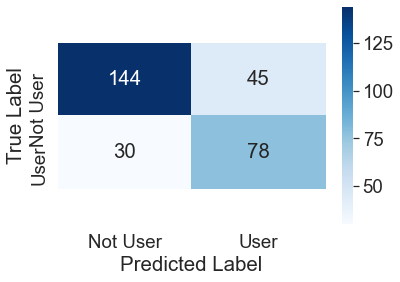

In [66]:
conf_matrix(y_test_cann, test_pred_logreg_U_cann,'Cannabis')

In [67]:
#PLOT F1 SCORE E ACCURACY FOR EACH PREDICTOR
#MAKE COMP WITH UNDERSAMPLING AND OVERSAMPLIG

def get_final_plots(drug, drug_dim):
    fig, axs = plt.subplots(ncols=2,nrows=1,figsize=(35,10))
   
    x = [0.5,2.5,4.5,6.5,8.5]
    axs[0].bar([0.25,2.25,4.25,6.25,8.25],[eval(f'accuracy_test_DT_{drug_dim}'),eval(f'accuracy_test_RF_{drug_dim}'),eval(f'accuracy_test_logreg_{drug_dim}'),eval(f'accuracy_test_SVM_{drug_dim}'),eval(f'accuracy_test_kNN_{drug_dim}')],label='OverSample',color='c',width=.5, tick_label=["Decision Tree","Random Forest","Logistic Regression","SVM","K-nn"])
    axs[0].bar([0.75,2.75,4.75,6.75,8.75],[eval(f'accuracy_test_DT_U_{drug_dim}'),eval(f'accuracy_test_RF_U_{drug_dim}'),eval(f'accuracy_test_logreg_U_{drug_dim}'),eval(f'accuracy_test_SVM_U_{drug_dim}'),eval(f'accuracy_test_kNN_U_{drug_dim}')],label='UnderSample', color='g',width=.5)
    axs[1].bar([0.25,2.25,4.25,6.25,8.25],[eval(f'f1_score_test_DT_{drug_dim}'),eval(f'f1_score_test_RF_{drug_dim}'),eval(f'f1_score_test_logreg_{drug_dim}'),eval(f'f1_score_test_SVM_{drug_dim}'),eval(f'f1_score_test_kNN_{drug_dim}')],label='OverSample',color='c',width=.5, tick_label=["Decision Tree","Random Forest","Logistic Regression","SVM","K-nn"])
    axs[1].bar([0.75,2.75,4.75,6.75,8.75],[eval(f'f1_score_test_DT_U_{drug_dim}'),eval(f'f1_score_test_RF_U_{drug_dim}'),eval(f'f1_score_test_logreg_U_{drug_dim}'),eval(f'f1_score_test_SVM_U_{drug_dim}'),eval(f'f1_score_test_kNN_U_{drug_dim}')],label='UnderSample', color='g',width=.5)

    axs[0].legend()
    axs[1].legend()

    for p in axs[0].patches:
        axs[0].annotate("{:.2f}".format(p.get_height(), 'f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    for p in axs[1].patches:
        axs[1].annotate("{:.2f}".format(p.get_height(), 'f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')


    axs[0].set_ylabel('Accuracy')
    axs[1].set_ylabel('F1-score')
    axs[0].set_title(f'{drug} Accuracy Oversampling VS Undersampling')
    axs[1].set_title(f'{drug} F1-score Oversampling VS Undersampling')
    plt.savefig(f'Accuracy_F1score_{drug}.png', dpi=300, bbox_inches='tight')
    plt.show()

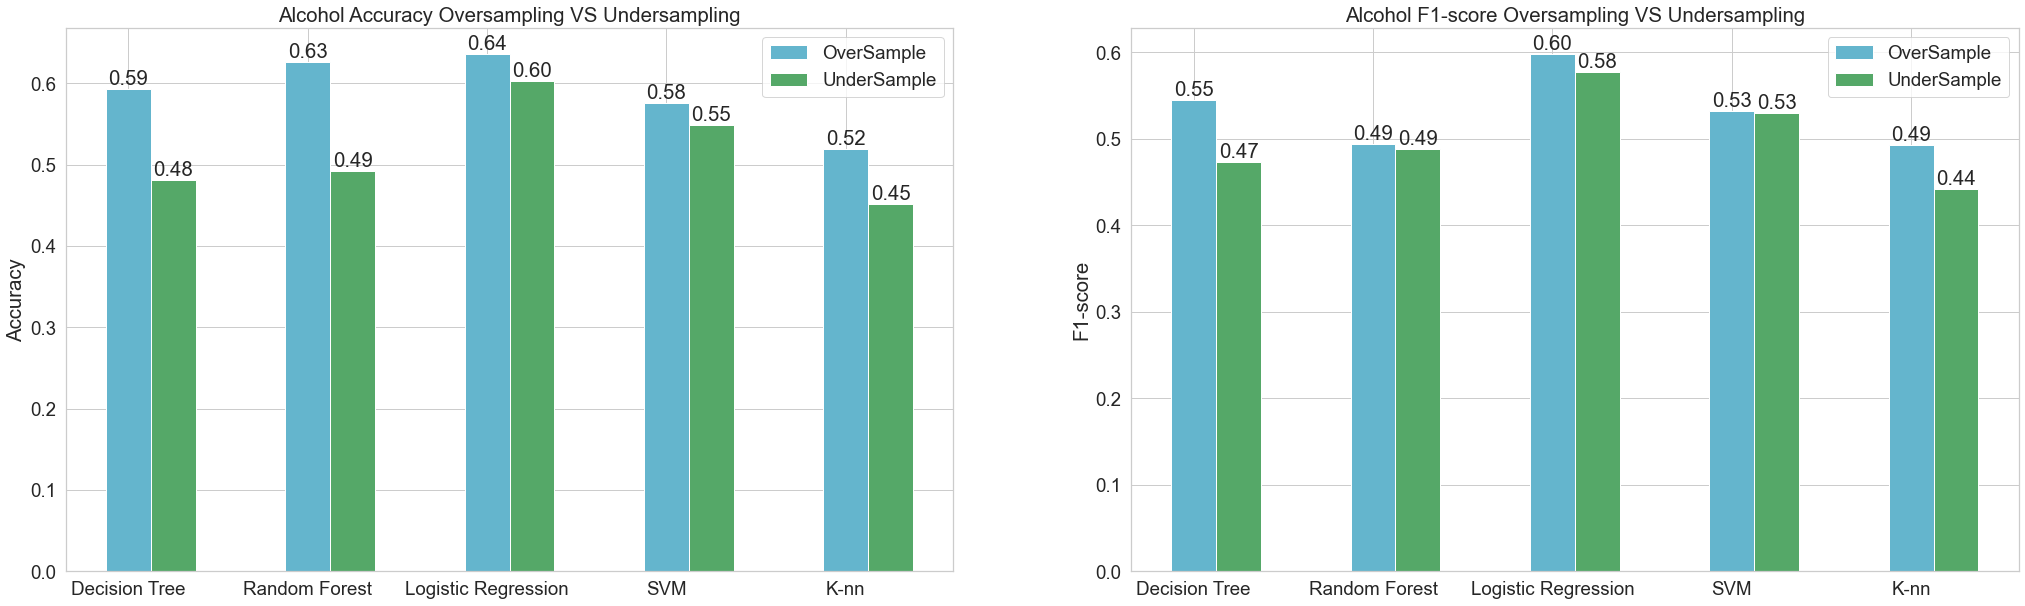

In [68]:
get_final_plots('Alcohol','alc')


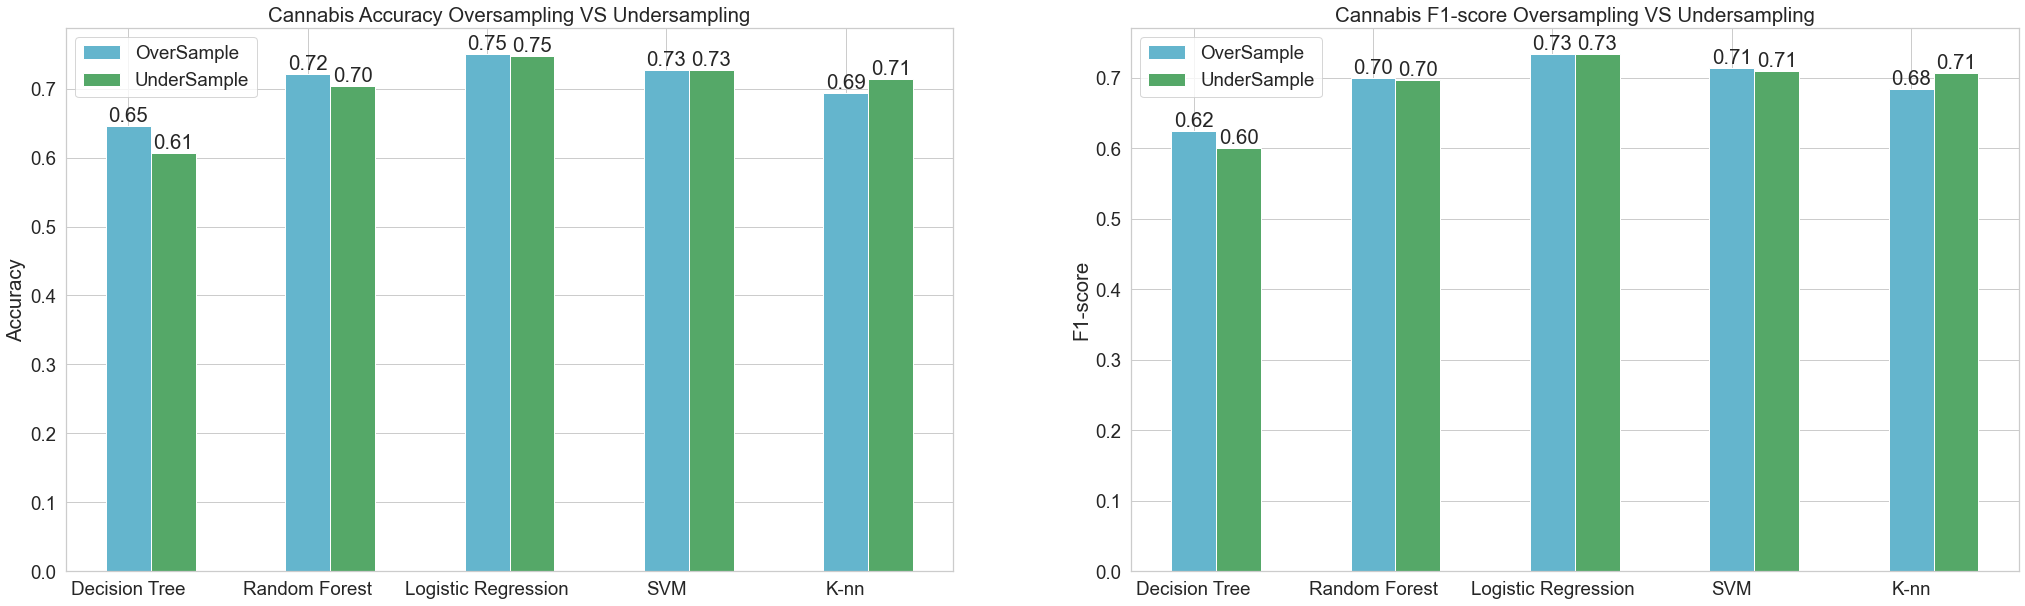

In [69]:
get_final_plots('Cannabis','cann')

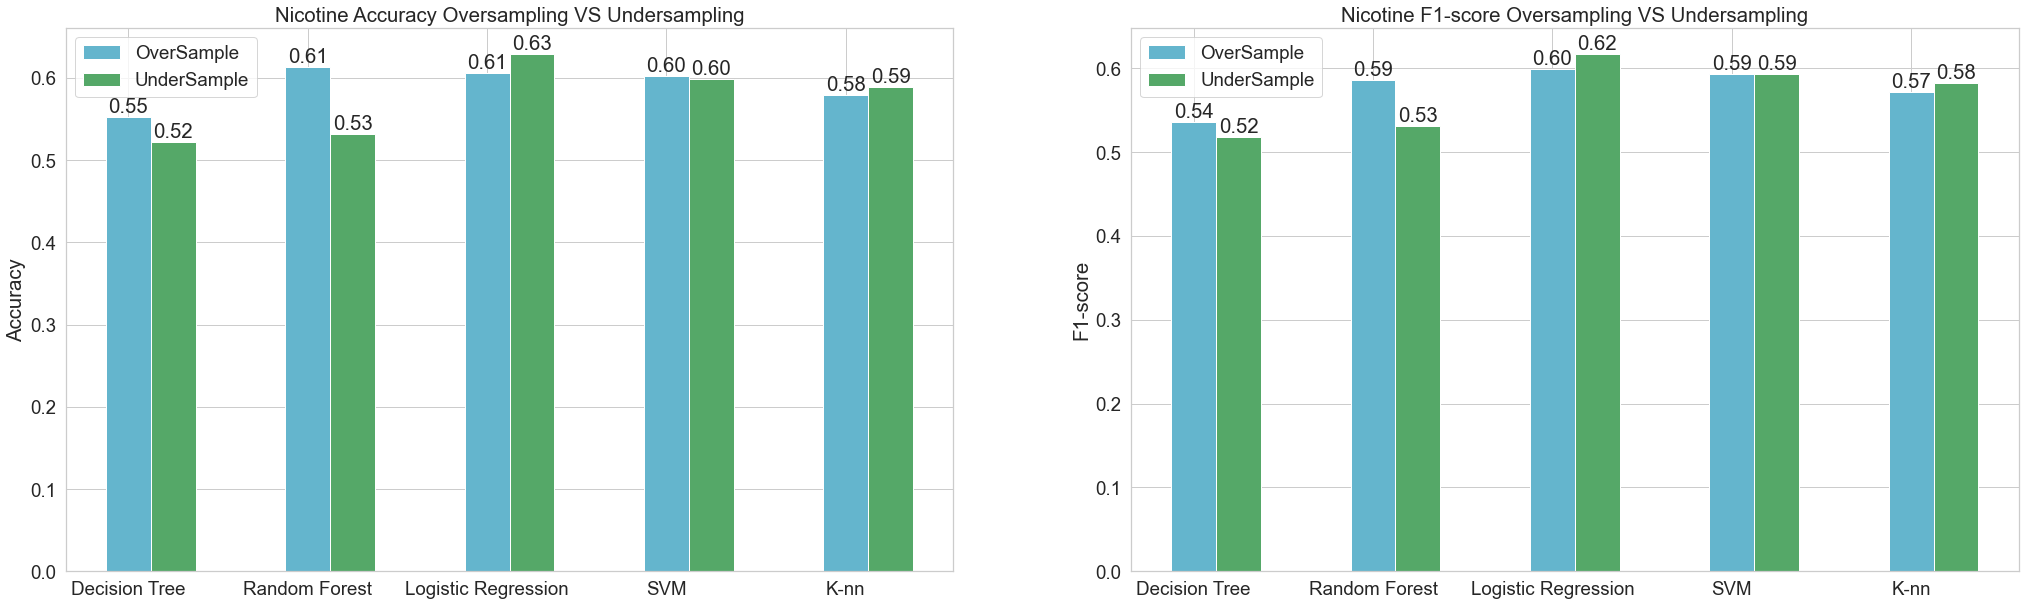

In [70]:
get_final_plots('Nicotine','nic')